# Configuração do Ambiente

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/PLN/projeto'

/content/drive/My Drive/PLN/projeto


In [ ]:
!git clone https://github.com/lplnufpi/essay-br.git

Cloning into 'essay-br'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 27 (delta 1), reused 3 (delta 1), pack-reused 21 (from 1)
Receiving objects: 100% (27/27), 4.31 MiB | 6.72 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [ ]:
%cd '/content/drive/My Drive/PLN/projeto/essay-br/'

/content/drive/My Drive/PLN/projeto/essay-br


In [ ]:
!pip install -r requirements.txt

In [ ]:
%cd '/content/drive/My Drive/PLN/projeto/essay-br/extended-corpus'

/content/drive/My Drive/PLN/projeto/essay-br/extended-corpus


In [ ]:
import pandas as pd

df_redacoes = pd.read_csv("extended_essay-br.csv")
df_temas = pd.read_csv("prompts.csv")

print("Redações:\n", df_redacoes.sample(n=20))
print("\nTemas:\n", df_temas.sample(n=20))

Redações:
       prompt                                              title  \
4594      94                                                NaN   
2709      69                                                NaN   
5693      94     Desafios para inclusão nas escolas brasileiras   
2641      51      O analfabetismo como forma de controle social   
2122      71  A influência das mídias sociais na construção ...   
130       21                O transporte que paralisou o Brasil   
3626      46                                                  .   
5327      91             Negacionismo e seus efeitos colaterais   
5642      94                  AUTISMO, desafios para a inclusão   
4382      46                       Privando os direitos básicos   
4286      85                   Participação popular na política   
3993      49  A responsabilidade social dos influenciadores ...   
6427     141                                    Mundo em crise?   
2632      70                   Malefício Periódico 

In [ ]:
qtd_c4 = df_redacoes['c4'].count()

distribuicao_c4 = df_redacoes['c4'].value_counts().sort_index()

print(f"Quantidade de notas na competência 4: {qtd_c4}")
print("\nDistribuição das notas na competência 4:")
print(distribuicao_c4)

Quantidade de notas na competência 4: 6577

Distribuição das notas na competência 4:
c4
0       207
40       65
80      885
120    2459
160    1822
200    1139
Name: count, dtype: int64


In [ ]:
import pandas as pd

amostra = df_redacoes.sample(n=5)

for idx, redacao in amostra['essay'].items():
    print(f"--- Redação {idx} ---\n{redacao}\n")

--- Redação 3101 ---
['Historicamente a restrição ou a permissão do porte de arma a um cidadão comum gera grandes debates na sociedade. Desta forma, o Estatuto do Desarmamento que gerou grandes diminuições de homicídios de 2003 aos dias atuais, vem sendo ameaçado por tentativas de revogação.', 'De acordo com José Mariano Beltrame” o uso de armas deve ser restrito ás forças policiais”(.) há oito anos na frente da Secretária de Estado de Segurança do Rio de Janeiro e categórico ao afirmar que o estatuto de desarmamento e um importantíssimo instrumento na proteção da vida.', 'Pois, após o vigenciamento da lei do desarmamento o índice de homicífio caiu de 36 por 100 mil habitantes em 2007, para 19 por 100 mil habitantes em 2014 no Rio de Janeiro. Corroborando com os índices, o mapa da violência em 2015 mostra  que no primeiro ano de vigência da lei do Desarmamento houve uma queda pela primeira vez após mais de uma década de crescimento ininterrupto – diminuindo de 39.325 mortes (2003) para

In [ ]:
!python -m spacy download pt_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 3.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# Uso de Conectivos

In [ ]:
categorias_conectivos = {
    "adição": [
        "também", "além disso", "ademais", "bem como", "ainda",
        "do mesmo modo", "adicionalmente", "outrossim", "igualmente",
        "não só", "mas também", "como também", "por outro lado",
        "da mesma forma", "similarmente", "juntamente com", "da mesma maneira",
        "assim como", "além do mais", "como se não bastasse", "não apenas"
    ],

    "conclusão": [
        "portanto", "logo", "então", "assim", "por conseguinte",
        "enfim", "em suma", "em conclusão", "desse modo", "destarte",
        "diante disso", "nesse sentido", "por isso", "consequentemente",
        "como resultado", "sendo assim", "em vista disso", "logo após",
        "resumindo", "em síntese", "de modo geral", "para concluir",
        "em resumo", "dessa forma", "nesse contexto"
    ],

    "comparação": [
        "assim como", "da mesma maneira", "mais que", "menos que",
        "tão", "quanto", "tal qual", "similarmente", "comparativamente",
        "de forma análoga", "em comparação com", "tanto quanto",
        "da mesma forma", "do mesmo jeito", "parecido com", "igual a",
        "semelhantemente", "analogamente", "de modo equivalente"
    ],

    "oposição": [
        "mas", "porém", "entretanto", "contudo", "todavia",
        "no entanto", "pelo contrário", "por outro lado", "embora",
        "apesar de", "ainda assim", "não obstante", "em contrapartida",
        "ao passo que", "se bem que", "mesmo que", "ao contrário de",
        "em oposição a", "diferentemente de", "ao invés de", "em contraste",
        "antagonicamente", "contrariamente", "não fosse isso"
    ],

    "exemplificação": [
        "por exemplo", "isto é", "tal como", "exemplificando",
        "em outras palavras", "a saber", "como ilustração",
        "como caso típico", "como demonstra", "como se vê em",
        "entre outros", "dentre os quais", "detalhadamente", "verbi gratia",
        "a título de exemplo", "para exemplificar", "ilustrativamente"
    ],

    "causalidade": [
        "pois", "porque", "visto que", "já que", "dado que",
        "em virtude de", "devido a", "por causa de", "graças a",
        "tendo em vista", "como resultado de", "em decorrência de",
        "uma vez que", "conforme", "segundo", "por motivo de",
        "de forma que", "tanto que", "de tal modo que", "tão que",
        "por consequência", "na medida em que", "em função de"
    ],

    "concessão": [
        "apesar de", "embora", "ainda que", "mesmo que",
        "por mais que", "nem que", "se bem que", "posto que",
        "mesmo assim", "ainda assim", "não obstante", "conquanto",
        "se acaso", "ainda quando", "nem por isso", "malgrado",
        "não fosse isso", "independentemente de"
    ],

    "condição": [
        "caso", "contanto que", "salvo se", "a não ser que",
        "desde que", "a menos que", "exceto se", "na hipótese de",
        "na eventualidade de", "quando", "sempre que", "uma vez que",
        "dado que", "provido que", "na condição de", "com a condição de",
        "sob condição de", "sob a condição de", "caso em que", "eventualmente"
    ],

    "finalidade": [
        "para que", "a fim de que", "com o intuito de", "com o propósito de",
        "com o objetivo de", "no intuito de", "visando a", "de modo a",
        "de forma a", "de maneira que", "com a finalidade de",
        "com vistas a", "com o fito de", "no sentido de", "para fins de",
        "com o escopo de", "com o propósito de"
    ],

    "tempo": [
        "antes", "depois", "enquanto", "quando", "sempre que",
        "assim que", "logo que", "imediatamente", "antigamente",
        "atualmente", "posteriormente", "anteriormente", "doravante",
        "daqui em diante", "a partir de", "até que", "desde que",
        "durante", "ao mesmo tempo", "simultaneamente", "primeiramente",
        "em primeiro lugar", "por fim", "finalmente", "a seguir",
        "subsequentemente", "nesse ínterim", "previamente"
    ],

    "reformulação": [
        "ou seja", "isto é", "a saber", "quer dizer", "melhor dizendo",
        "em outros termos", "expresso de outra forma", "para esclarecer",
        "para detalhar", "para explicar melhor", "para ser mais preciso",
        "dito de outro modo", "em outras palavras", "noutros termos",
        "explicitando", "esclarecendo melhor"
    ],

    "dúvida": [
        "talvez", "possivelmente", "porventura", "é provável",
        "quiçá", "acaso", "casualmente", "eventualmente",
        "pode ser que", "não é certo que", "duvidosamente",
        "incertamente", "hipoteticamente", "supostamente", "provavelmente",
        "quem sabe", "não sei se", "é possível que"
    ],

    "afirmação": [
        "certamente", "evidentemente", "realmente", "sem dúvida",
        "decerto", "efetivamente", "com certeza", "indubitavelmente",
        "incontestavelmente", "obviamente", "claro", "naturalmente",
        "de fato", "na verdade", "conforme esperado", "como previsto",
        "efetivamente", "sem sombra de dúvida", "indiscutivelmente"
    ],

    "negação": [
        "nunca", "jamais", "tampouco", "em hipótese alguma",
        "de modo algum", "de forma alguma", "de jeito nenhum",
        "nem mesmo", "sequer", "absolutamente não", "de nenhuma forma",
        "em nenhum caso", "negativamente"
    ],

    "proporção": [
        "à medida que", "ao passo que", "quanto mais", "quanto menos",
        "enquanto", "na proporção em que", "conforme", "segundo",
        "proporcionalmente a", "tanto mais quanto", "tanto menos quanto",
        "quanto maior", "maior", "quanto menor", "menor", "na razão de",
        "na exata medida em que", "paralelamente a"
    ],

    "alternância": [
        "ou", "ora", "seja", "quer", "nem",
        "alternativamente", "de outro modo", "senão", "ou então",
        "se não", "de uma forma ou de outra", "seja como for",
        "de qualquer maneira", "de qualquer forma"
    ]
}

conectivos_alvo = [conectivo for categoria in categorias_conectivos.values() for conectivo in categoria]

Primeiramente, é feita uma análise linguística detalhada sobre o uso de conectivos em redações. O objetivo principal é investigar se existe uma correlação entre as características do uso de conectivos (como quantidade, diversidade e tipo) e a nota obtida na Competência 4 da redação.

O processo de análise segue os seguintes passos:

1.  Amostragem: É selecionada uma amostra estratificada de 6000 redações do *dataset* principal. A estratificação pela nota `c4` assegura que a distribuição de notas na amostra seja igual a do conjunto completo.

2.  Processamento: Utilizando a biblioteca `spaCy`, cada redação é segmentada em frases e palavras (*tokens*). A função `analisar_conectivos` faz o seguinte:
    * Identifica tanto conectivos simples (`mas`, `portanto`) quanto compostos (`além disso`, `tendo em vista que`).
    * Categorizar cada conectivo encontrado (ex: `conclusão`, `oposição`, `adição`).

3.  Extração de Métricas: Para cada redação, são calculadas diversas métricas, como:
    * `total_conectivos`: Quantidade total de conectivos.
    * `diversidade_conectivos`: Número de conectivos únicos e diferentes.
    * `media_conectivos_por_frase`: A densidade de conectivos nas frases.
    * `percent_frases_com_conectivos`: A proporção de frases que contêm conectivos pelo total de frases na redação.
    * Contagem por categoria (`cat_conclusao`, `cat_oposicao`, etc.).

4.  Análise e Visualização: Ao final, é gerado um painel completo de visualizações de dados, incluindo gráficos de dispersão, *boxplots* e uma matriz de correlação.

Analisando redações: 100%|██████████| 6000/6000 [22:51<00:00,  4.38it/s]


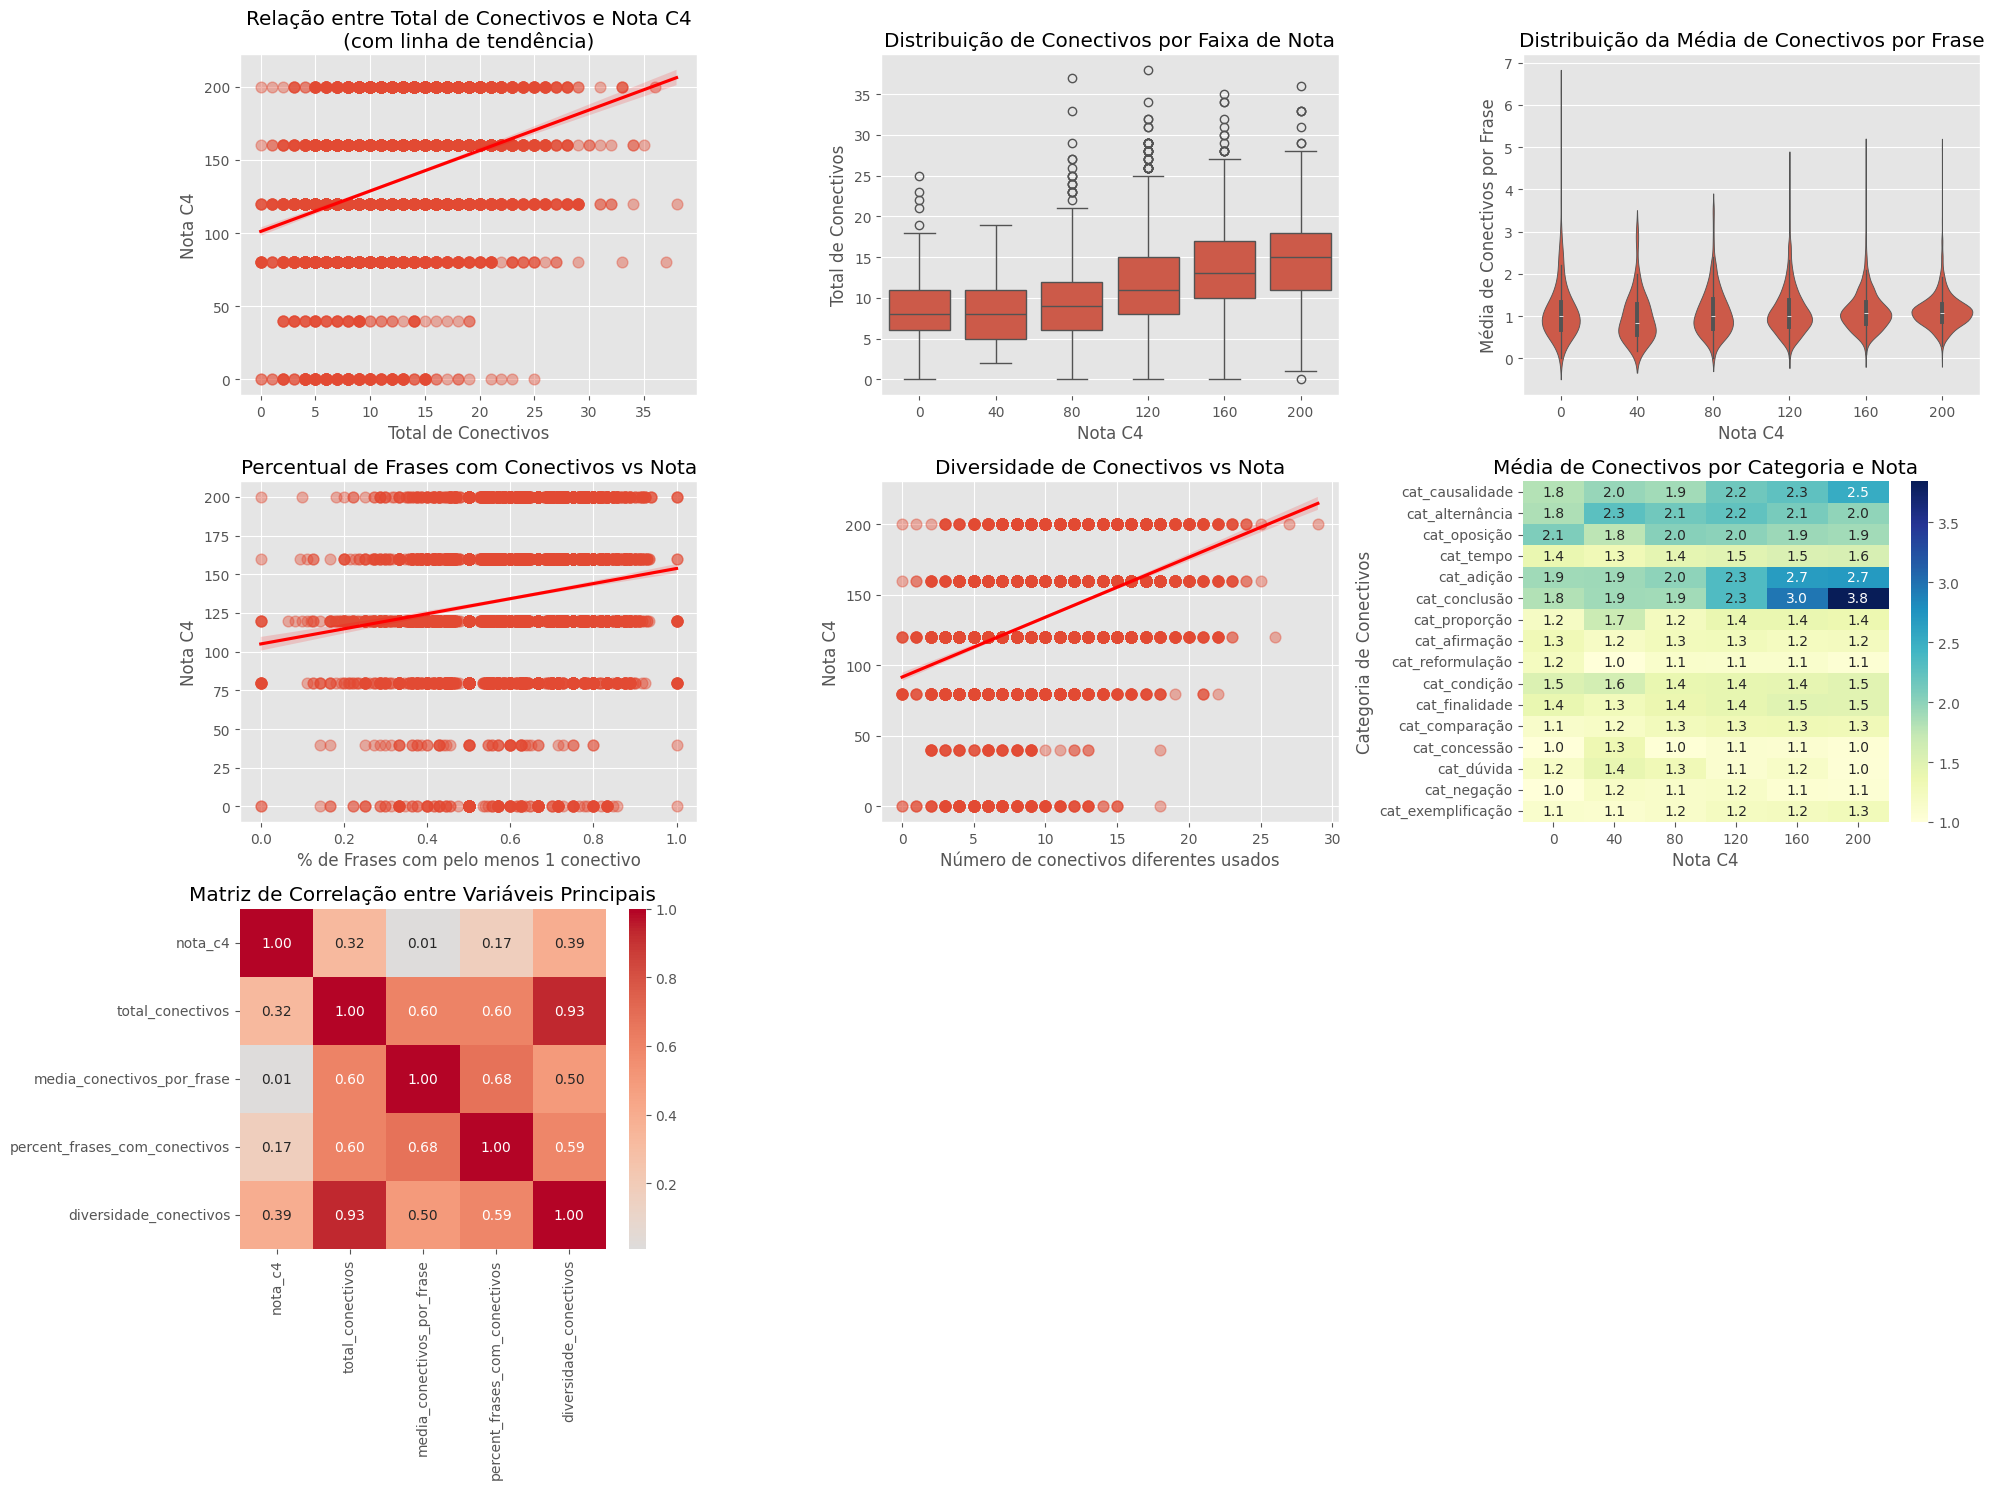

          count       mean       std  min   25%   50%   75%   max
nota_c4                                                          
0         189.0   8.518519  4.336378  0.0   6.0   8.0  11.0  25.0
40         59.0   8.355932  4.562828  2.0   5.0   8.0  11.0  19.0
80        808.0   9.740099  4.901688  0.0   6.0   9.0  12.0  37.0
120      2243.0  11.536781  5.171532  0.0   8.0  11.0  15.0  38.0
160      1662.0  13.390493  5.110316  0.0  10.0  13.0  17.0  35.0
200      1039.0  14.792108  4.851067  0.0  11.0  15.0  18.0  36.0

Nota 0:
cat_oposição       2.066667
cat_adição         1.900901
cat_alternância    1.839623
cat_conclusão      1.813559
cat_causalidade    1.805085
dtype: float64

Nota 40:
cat_alternância    2.272727
cat_causalidade    1.952381
cat_adição         1.914286
cat_conclusão      1.903226
cat_oposição       1.757576
dtype: float64

Nota 80:
cat_alternância    2.146667
cat_oposição       2.027972
cat_adição         1.989130
cat_causalidade    1.891941
cat_conclusão      1.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from tqdm import tqdm
from collections import defaultdict
from sklearn.model_selection import train_test_split
import numpy as np

tqdm.pandas()
plt.style.use('ggplot')

try:
    nlp = spacy.load("pt_core_news_lg")
except OSError:
    import subprocess
    subprocess.run(["python", "-m", "spacy", "download", "pt_core_news_lg"])
    nlp = spacy.load("pt_core_news_lg")

def analisar_conectivos(texto):
    doc = nlp(texto.lower())
    resultados = {
        'total_conectivos': 0,
        'conectivos_por_categoria': defaultdict(int),
        'conectivos_por_frase': [],
        'frases': []
    }

    conectivos_multiword = sorted(
        [conn for conn in conectivos_alvo if len(conn.split()) > 1],
        key=lambda x: len(x.split()),
        reverse=True
    )

    for sent in doc.sents:
        frase_info = {
            'texto': sent.text,
            'conectivos': [],
            'total': 0
        }

        tokens_ignorados = set()

        for conn in conectivos_multiword:
            conn_tokens = conn.split()
            len_conn = len(conn_tokens)

            for i in range(len(sent) - len_conn + 1):
                if i in tokens_ignorados:
                    continue

                span_tokens = [sent[j].text for j in range(i, i + len_conn)]
                if " ".join(span_tokens) == conn:
                    categoria = next(
                        (cat for cat, conns in categorias_conectivos.items()
                         if conn in conns),
                        'outros'
                    )

                    resultados['total_conectivos'] += 1
                    resultados['conectivos_por_categoria'][categoria] += 1
                    frase_info['conectivos'].append({
                        'texto': conn,
                        'categoria': categoria
                    })
                    frase_info['total'] += 1

                    for j in range(i, i + len_conn):
                        tokens_ignorados.add(j)

        for i, token in enumerate(sent):
            if i not in tokens_ignorados and token.text in conectivos_alvo:
                categoria = next(
                    (cat for cat, conns in categorias_conectivos.items()
                     if token.text in conns),
                    'outros'
                )

                resultados['total_conectivos'] += 1
                resultados['conectivos_por_categoria'][categoria] += 1
                frase_info['conectivos'].append({
                    'texto': token.text,
                    'categoria': categoria
                })
                frase_info['total'] += 1

        resultados['frases'].append(frase_info)
        resultados['conectivos_por_frase'].append(frase_info['total'])

    num_frases = len(resultados['frases'])
    resultados['media_conectivos_por_frase'] = resultados['total_conectivos'] / num_frases if num_frases > 0 else 0
    resultados['max_conectivos_por_frase'] = max(resultados['conectivos_por_frase']) if num_frases > 0 else 0
    resultados['frases_sem_conectivos'] = sum(1 for f in resultados['frases'] if f['total'] == 0)

    return resultados

def processar_redacoes(df):
    resultados = []

    for _, row in tqdm(df.iterrows(), total=len(df), desc="Analisando redações"):
        analise = analisar_conectivos(row['essay'])

        entrada = {
            'prompt': row['prompt'],
            'nota_c4': row['c4'],
            'total_conectivos': analise['total_conectivos'],
            'media_conectivos_por_frase': analise['media_conectivos_por_frase'],
            'max_conectivos_por_frase': analise['max_conectivos_por_frase'],
            'frases_sem_conectivos': analise['frases_sem_conectivos'],
            'percent_frases_com_conectivos': 1 - (analise['frases_sem_conectivos'] / len(analise['frases'])) if len(analise['frases']) > 0 else 0,
            'diversidade_conectivos': len(set(c['texto'] for f in analise['frases'] for c in f['conectivos']))
        }

        for categoria, total in analise['conectivos_por_categoria'].items():
            entrada[f'cat_{categoria}'] = total

        resultados.append(entrada)

    return pd.DataFrame(resultados)

def visualizar_analise_completa(df_analise):
    """Gera visualizações completas da análise"""
    plt.figure(figsize=(20, 15))

    plt.subplot(3, 3, 1)
    sns.regplot(x='total_conectivos', y='nota_c4', data=df_analise,
                scatter_kws={'alpha':0.4, 's':60}, line_kws={'color':'red'})
    plt.title('Relação entre Total de Conectivos e Nota C4\n(com linha de tendência)')
    plt.xlabel('Total de Conectivos')
    plt.ylabel('Nota C4')

    plt.subplot(3, 3, 2)
    sns.boxplot(x='nota_c4', y='total_conectivos', data=df_analise)
    plt.title('Distribuição de Conectivos por Faixa de Nota')
    plt.xlabel('Nota C4')
    plt.ylabel('Total de Conectivos')

    plt.subplot(3, 3, 3)
    sns.violinplot(x='nota_c4', y='media_conectivos_por_frase', data=df_analise)
    plt.title('Distribuição da Média de Conectivos por Frase')
    plt.xlabel('Nota C4')
    plt.ylabel('Média de Conectivos por Frase')

    plt.subplot(3, 3, 4)
    sns.regplot(x='percent_frases_com_conectivos', y='nota_c4', data=df_analise,
                scatter_kws={'alpha':0.4, 's':60}, line_kws={'color':'red'})
    plt.title('Percentual de Frases com Conectivos vs Nota')
    plt.xlabel('% de Frases com pelo menos 1 conectivo')
    plt.ylabel('Nota C4')

    plt.subplot(3, 3, 5)
    sns.regplot(x='diversidade_conectivos', y='nota_c4', data=df_analise,
                scatter_kws={'alpha':0.4, 's':60}, line_kws={'color':'red'})
    plt.title('Diversidade de Conectivos vs Nota')
    plt.xlabel('Número de conectivos diferentes usados')
    plt.ylabel('Nota C4')

    categorias = [col.replace('cat_', '') for col in df_analise.columns if col.startswith('cat_')]
    df_categorias = df_analise.groupby('nota_c4')[['cat_' + c for c in categorias]].mean().T

    plt.subplot(3, 3, 6)
    sns.heatmap(df_categorias, annot=True, fmt='.1f', cmap='YlGnBu')
    plt.title('Média de Conectivos por Categoria e Nota')
    plt.xlabel('Nota C4')
    plt.ylabel('Categoria de Conectivos')

    plt.subplot(3, 3, 7)
    cols_corr = ['nota_c4', 'total_conectivos', 'media_conectivos_por_frase',
                 'percent_frases_com_conectivos', 'diversidade_conectivos']
    sns.heatmap(df_analise[cols_corr].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
    plt.title('Matriz de Correlação entre Variáveis Principais')

    plt.tight_layout()
    plt.show()

    print(df_analise.groupby('nota_c4')['total_conectivos'].describe())

    for nota in sorted(df_analise['nota_c4'].unique()):
        print(f"\nNota {nota}:")
        top_cats = df_analise[df_analise['nota_c4'] == nota][['cat_' + c for c in categorias]].mean().sort_values(ascending=False)
        print(top_cats.head(5))

    print(df_analise[['nota_c4', 'total_conectivos', 'diversidade_conectivos']].corr())

if __name__ == "__main__":
    df_amostra, _ = train_test_split(df_redacoes, train_size=6000, stratify=df_redacoes['c4'], random_state=42)
    df_analise = processar_redacoes(df_amostra)
    visualizar_analise_completa(df_analise)

A análise dos dados revela uma correlação clara e positiva entre o uso de conectivos e as notas da Competência 4. Os resultados indicam que não apenas a quantidade, mas principalmente a variedade e o tipo de conectivo utilizado são diferenciadores importantes para as notas mais altas.

Com base nos resultados:

*  A diversidade de conectivos apresenta a correlação mais forte com a nota C4 (0,39). Isso é mais significativo do que a correlação do total de conectivos, que é de 0,32. Ou seja, usar um repertório variado de conectivos é um indicador de nota alta mais forte do que simplesmente usar muitos conectivos.

*  O heatmap de categorias é extremamente revelador. O uso de conectivos de conclusão aumenta drasticamente com a nota, saltando de uma média de 1,8 para notas baixas (faixa 0-80) até 3,8 para a nota 200. Isso sugere que a habilidade de articular e finalizar ideias de forma coesa é muito importante em redações de maior pontuação. Pode-se observar uma clara evolução da maturidade argumentativa à medida que as notas aumentam, dada pelas categorias de conectivos utilizadas.

*  Enquanto os boxplots mostram uma tendência clara de que notas maiores utilizam um número total maior de conectivos, o gráfico de distribuição da média de conectivos por frase (violin plot) mostra que a densidade de conectivos dentro de cada frase não muda significativamente entre as notas (correlação de apenas 0,01 com a nota). Isso indica que a diferença principal não está na densidade de conectivos por frase, mas sim na quantidade total e na variedade, como visto em outros gráficos.

*  As estatísticas descritivas confirmam o que os gráficos mostram: a média de conectivos totais cresce consistentemente com a nota, passando de aproximadamente 8,5 para a nota 0 até 14,8 para a nota 200.

## Adequação dos Conectivos

O código abaixo analisa as redações para avaliar se os conectivos estão sendo empregados de maneira adequada, para isso, ele:

*   Identifica conectivos: Encontra os conectivos com base na lista declarada (considerando mais de uma palavra, por exemplo: "uma vez que").
*   Gera sugestões: Usa o BERT para propor alternativas ao conectivo usado.
*   Avalia adequação: Verifica se:
   - O conectivo original está entre as sugestões do BERT.
   - Se alguma das sugestões pertencem à mesma categoria (oposição, causa, conclusão, etc.).
*   Processamento em Lote
   - Analisa redações em lotes para melhor desempenho
*   Análise Estatística
   - Calcula taxas de adequação por redação
   - Gera visualizações e matriz de correlação

Usando dispositivo: cuda


Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Amostra estratificada de 6000 redações criada.


Processando redações:   0%|          | 0/750 [00:00<?, ?it/s]

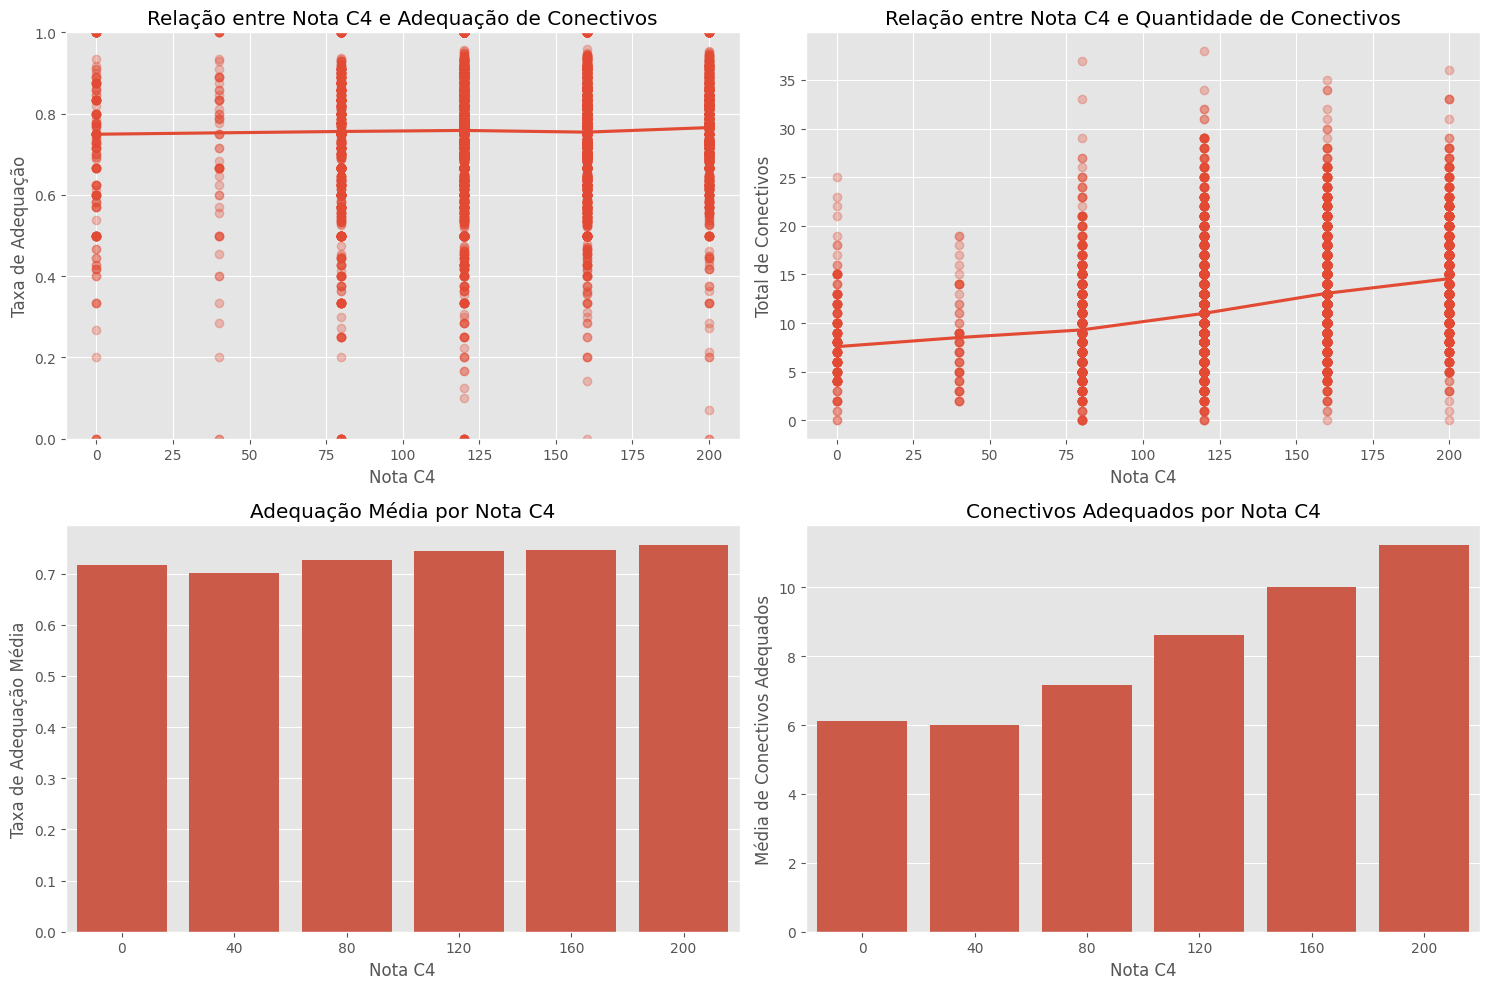


Matriz de Correlação:
                        c4  taxa_adequacao  total_conectivos
c4                1.000000        0.061492          0.325385
taxa_adequacao    0.061492        1.000000          0.066148
total_conectivos  0.325385        0.066148          1.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap
from transformers import BertTokenizer, BertForMaskedLM
import torch
import spacy
from tqdm.notebook import tqdm
from collections import defaultdict
import numpy as np
from sklearn.model_selection import train_test_split

tqdm.pandas()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Usando dispositivo: {device}")

try:
    nlp = spacy.load("pt_core_news_lg")
except OSError:
    import subprocess
    subprocess.run(["python", "-m", "spacy", "download", "pt_core_news_lg"])
    nlp = spacy.load("pt_core_news_lg")

tokenizer = BertTokenizer.from_pretrained("neuralmind/bert-base-portuguese-cased")
model = BertForMaskedLM.from_pretrained("neuralmind/bert-base-portuguese-cased").to(device)
model.eval()

def encontrar_categoria(conectivo, categorias_dict):
    conectivo_lower = conectivo.lower()
    for categoria, conectivos_lista in categorias_dict.items():
        if conectivo_lower in conectivos_lista:
            return categoria
    return None

def encontrar_conectivos(doc, conectivos_lista):
    matches = []
    tokens_ja_usados = set()
    conectivos_ordenados = sorted(list(set(conectivos_lista)), key=lambda x: len(x.split()), reverse=True)

    for n in range(4, 0, -1):
        for i in range(len(doc) - n + 1):
            if any(j in tokens_ja_usados for j in range(i, i + n)):
                continue

            span = doc[i:i+n]
            span_text = span.text.lower()

            if span_text in conectivos_ordenados:
                matches.append(span)
                for j in range(i, i + n):
                    tokens_ja_usados.add(j)
    return matches

def verificar_sugestoes_por_categoria(conectivo_original, sugestoes, categorias_dict):
    categoria_original = encontrar_categoria(conectivo_original, categorias_dict)
    if not categoria_original:
        return False

    for sugestao in sugestoes:
        categoria_sugestao = encontrar_categoria(sugestao, categorias_dict)
        if categoria_sugestao == categoria_original:
            return True
    return False

def processar_lote_redacoes(df, batch_size=32):
    resultados = []
    for i in tqdm(range(0, len(df), batch_size), desc="Processando redações"):
        lote = df.iloc[i:i+batch_size]
        textos = lote['essay'].tolist()
        docs = list(nlp.pipe(textos))

        for doc, (idx, row) in zip(docs, lote.iterrows()):
            conectivos_encontrados = encontrar_conectivos(doc, conectivos_alvo)
            total = len(conectivos_encontrados)

            if total == 0:
                resultados.append({
                    'id': idx,
                    'total_conectivos': 0,
                    'adequados': 0,
                    'taxa_adequacao': 0.0,
                    'processado': True
                })
                continue

            itens_para_bert = []
            for span in conectivos_encontrados:
                sent = span.sent
                frase_mascarada = sent.text[:span.start_char - sent.start_char] + tokenizer.mask_token + sent.text[span.end_char - sent.start_char:]
                itens_para_bert.append({
                    'conectivo_original': span.text,
                    'frase_mascarada': frase_mascarada
                })

            if not itens_para_bert:
                continue

            frases_mascaradas = [item['frase_mascarada'] for item in itens_para_bert]
            inputs = tokenizer(frases_mascaradas, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)

            with torch.no_grad():
                outputs = model(**inputs)

            mask_token_indices = (inputs.input_ids == tokenizer.mask_token_id).nonzero(as_tuple=True)
            adequados_count = 0

            for j in range(len(itens_para_bert)):
                if len(mask_token_indices[0]) <= j:
                    continue
                mask_index_in_sequence = mask_token_indices[1][j]
                logits = outputs.logits[j, mask_index_in_sequence]
                top_k_tokens = torch.topk(logits, 8).indices.tolist()
                sugestoes_bert = [tokenizer.decode([t]).strip().lower() for t in top_k_tokens]
                conectivo_original = itens_para_bert[j]['conectivo_original']
                adequado_direto = conectivo_original.lower() in sugestoes_bert
                adequado_categoria = False
                if not adequado_direto:
                    adequado_categoria = verificar_sugestoes_por_categoria(conectivo_original, sugestoes_bert, categorias_conectivos)
                adequado = adequado_direto or adequado_categoria
                if adequado:
                    adequados_count += 1

            resultados.append({
                'id': idx,
                'total_conectivos': total,
                'adequados': adequados_count,
                'taxa_adequacao': adequados_count / total if total > 0 else 0,
                'processado': True
            })

    return pd.DataFrame(resultados)

def analisar_conectivos_batch(df_redacoes, batch_size=32):
    df_resultados = processar_lote_redacoes(df_redacoes, batch_size)

    if df_resultados.empty:
        df_redacoes['processado'] = False
        df_redacoes['total_conectivos'] = 0
        df_redacoes['adequados'] = 0
        df_redacoes['taxa_adequacao'] = 0.0
        return df_redacoes

    df_final = pd.merge(df_redacoes, df_resultados, left_index=True, right_on='id', how='left')

    df_final['processado'] = df_final['processado'].fillna(False)
    df_final.fillna({'total_conectivos': 0, 'adequados': 0, 'taxa_adequacao': 0.0}, inplace=True)
    df_final[['total_conectivos', 'adequados']] = df_final[['total_conectivos', 'adequados']].astype(int)

    return df_final

def visualizar_resultados(df_analise):
    df_filtrado = df_analise[df_analise['processado'] == True].copy()

    if len(df_filtrado) == 0:
        print("Nenhuma redação foi processada para análise.")
        return

    df_agregado = df_filtrado.groupby('c4').agg({
        'taxa_adequacao': 'mean',
        'total_conectivos': 'mean',
        'adequados': 'mean'
    }).reset_index()

    plt.figure(figsize=(15, 10))
    plt.style.use('ggplot')

    plt.subplot(2, 2, 1)
    sns.regplot(x='c4', y='taxa_adequacao', data=df_filtrado, scatter_kws={'alpha': 0.3}, lowess=True)
    plt.title('Relação entre Nota C4 e Adequação de Conectivos')
    plt.xlabel('Nota C4')
    plt.ylabel('Taxa de Adequação')
    plt.ylim(0, 1)

    plt.subplot(2, 2, 2)
    sns.regplot(x='c4', y='total_conectivos', data=df_filtrado, scatter_kws={'alpha': 0.3}, lowess=True)
    plt.title('Relação entre Nota C4 e Quantidade de Conectivos')
    plt.xlabel('Nota C4')
    plt.ylabel('Total de Conectivos')

    plt.subplot(2, 2, 3)
    sns.barplot(x='c4', y='taxa_adequacao', data=df_agregado)
    plt.title('Adequação Média por Nota C4')
    plt.xlabel('Nota C4')
    plt.ylabel('Taxa de Adequação Média')

    plt.subplot(2, 2, 4)
    sns.barplot(x='c4', y='adequados', data=df_agregado)
    plt.title('Conectivos Adequados por Nota C4')
    plt.xlabel('Nota C4')
    plt.ylabel('Média de Conectivos Adequados')

    plt.tight_layout()
    plt.show()

    if not df_filtrado.empty:
        correlacao = df_filtrado[['c4', 'taxa_adequacao', 'total_conectivos']].corr()
        print("\nMatriz de Correlação:")
        print(correlacao)

df_amostra, _ = train_test_split(df_redacoes, train_size=6000, stratify=df_redacoes['c4'], random_state=42)

print(f"Amostra estratificada de {len(df_amostra)} redações criada.")
df_amostra['essay'] = df_amostra['essay'].fillna('').astype(str).str.strip("[]'\"")
df_analise_final = analisar_conectivos_batch(df_amostra, batch_size=8)

visualizar_resultados(df_analise_final)

As principais conclusões são:

*  Existe uma correlação muito fraca (0,06) entre a taxa de adequação e a nota da competência. Isso indica que, ao analisar o conjunto de todas as notas, a habilidade de usar um conectivo com o sentido lógico correto (qualidade) tem pouca correlação com a nota final da competência.

*  O gráfico de barras da "Média de Conectivos Adequados por Nota C4" é o mais informativo. Ele mostra uma progressão geral, onde notas mais altas correspondem a um número absoluto maior de conectivos bem utilizados (com um pico notável em 200).
  *  Isso ocorre porque a quantidade total de conectivos (correlação de 0,32) se mostrou um indicador mais forte da nota do que a taxa de adequação.

A análise sugere que o primeiro e mais fundamental passo para uma boa nota na C4 é simplesmente usar uma quantidade maior de elementos coesivos, o que distingue mais claramente as redações de nota baixa das demais.

Processando 6000 textos em lotes de 128...


Analisando textos em lote: 100%|██████████| 6000/6000 [08:43<00:00, 11.47it/s]


       c4  score  taxa_conectivos_local
4425  200    920               0.058333
2743  160    680               0.045000
2360  120    640               0.053125
3492  120    720               0.043182
1091  120    520               0.051923

Matriz de Correlação:
                       taxa_conectivos_local        c4     score
taxa_conectivos_local               1.000000  0.085042  0.059088
c4                                  0.085042  1.000000  0.905490
score                               0.059088  0.905490  1.000000


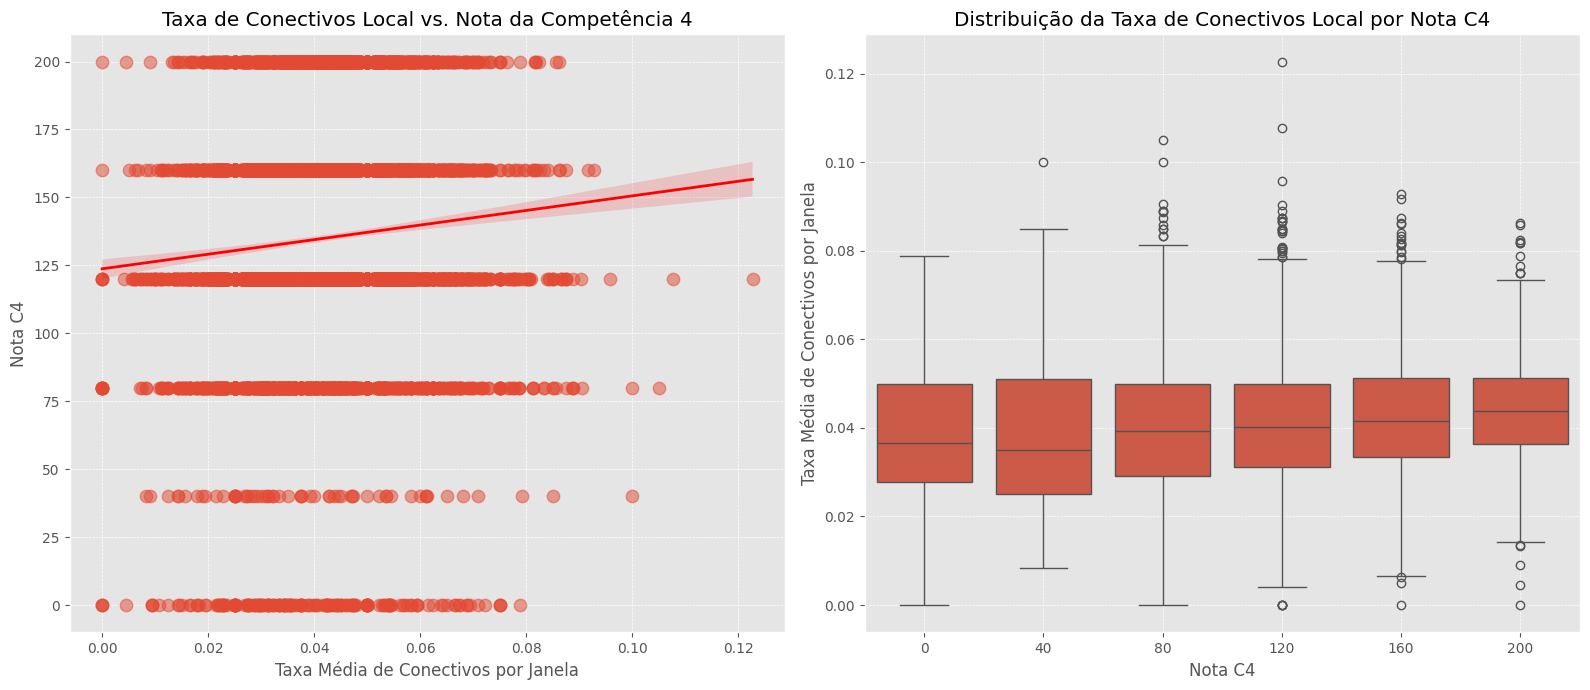

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from tqdm import tqdm
from sklearn.model_selection import train_test_split

tqdm.pandas()
plt.style.use('ggplot')

try:
    nlp = spacy.load("pt_core_news_lg")
except OSError:
    import subprocess
    print("Baixando o modelo pt_core_news_lg do spaCy...")
    subprocess.run(["python", "-m", "spacy", "download", "pt_core_news_lg"])
    nlp = spacy.load("pt_core_news_lg")

conectivos_single = {conn for conn in conectivos_alvo if len(conn.split()) == 1}
conectivos_multiword = sorted(
    [conn for conn in conectivos_alvo if len(conn.split()) > 1],
    key=lambda x: len(x.split()),
    reverse=True
)

def _calcular_para_um_doc(doc: spacy.tokens.Doc, tamanho_janela: int, passo: int) -> float:
    """
    Função interna que aplica a lógica de cálculo a um único Doc do spaCy.
    """
    tokens = [token for token in doc if not token.is_punct]

    if len(tokens) < tamanho_janela:
        janelas = [tokens]
    else:
        janelas = [
            tokens[i : i + tamanho_janela]
            for i in range(0, len(tokens) - tamanho_janela + 1, passo)
        ]

    if not janelas:
        return 0.0

    taxas_por_janela = []
    for janela in janelas:
        count_conectivos = 0
        tokens_usados = set()

        janela_textos = [tok.text for tok in janela]

        for i in range(len(janela)):
            if i in tokens_usados:
                continue

            found_multi = False
            for conn_multi in conectivos_multiword:
                conn_tokens = conn_multi.split()
                len_conn = len(conn_tokens)
                if i + len_conn <= len(janela):
                    span_texto = " ".join(janela_textos[i : i + len_conn])
                    if span_texto == conn_multi:
                        count_conectivos += 1
                        for j in range(len_conn):
                            tokens_usados.add(i + j)
                        found_multi = True
                        break

            if not found_multi:
                if janela_textos[i] in conectivos_single:
                    count_conectivos += 1

        taxa_na_janela = count_conectivos / len(janela) if len(janela) > 0 else 0
        taxas_por_janela.append(taxa_na_janela)

    return np.mean(taxas_por_janela) if taxas_por_janela else 0.0

def analisar_taxa_local_em_lote(
    textos: pd.Series, tamanho_janela: int, passo: int, batch_size: int = 64
) -> list:
    """
    Processa uma série de textos em lotes usando nlp.pipe para maior eficiência.
    """
    resultados = []
    docs = nlp.pipe(
        textos.astype(str).str.lower(),
        batch_size=batch_size
    )

    total = len(textos)

    print(f"Processando {total} textos em lotes de {batch_size}...")
    for doc in tqdm(docs, total=total, desc="Analisando textos em lote"):
        taxa_local = _calcular_para_um_doc(doc, tamanho_janela, passo)
        resultados.append(taxa_local)

    return resultados

def visualizar_analise_local(df_analisado: pd.DataFrame):
    """
    Gera e exibe gráficos para visualizar a relação entre a taxa de conectivos local e as notas.
    """
    correlacao = df_analisado[['taxa_conectivos_local', 'c4', 'score']].corr()
    print("\nMatriz de Correlação:")
    print(correlacao)

    plt.figure(figsize=(16, 7))
    plt.subplot(1, 2, 1)
    sns.regplot(
        x='taxa_conectivos_local',
        y='c4',
        data=df_analisado,
        scatter_kws={'alpha': 0.5, 's': 80},
        line_kws={'color': 'red', 'linewidth': 2}
    )
    plt.title('Taxa de Conectivos Local vs. Nota da Competência 4')
    plt.xlabel('Taxa Média de Conectivos por Janela')
    plt.ylabel('Nota C4')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.subplot(1, 2, 2)
    ordem_notas = sorted(df_analisado['c4'].unique())
    sns.boxplot(
        x='c4',
        y='taxa_conectivos_local',
        data=df_analisado,
        order=ordem_notas
    )
    plt.title('Distribuição da Taxa de Conectivos Local por Nota C4')
    plt.xlabel('Nota C4')
    plt.ylabel('Taxa Média de Conectivos por Janela')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    df_amostra, _ = train_test_split(df_redacoes, train_size=6000, stratify=df_redacoes['c4'], random_state=42)
    df_amostra.loc[:, 'essay'] = df_amostra['essay'].fillna('')

    resultados_analise_local = analisar_taxa_local_em_lote(
        textos=df_amostra['essay'],
        tamanho_janela=40,
        passo=20,
        batch_size=128
    )

    df_final = df_amostra.copy()
    df_final['taxa_conectivos_local'] = resultados_analise_local

    print(df_final[['c4', 'score', 'taxa_conectivos_local']].head())
    visualizar_analise_local(df_final)

Com esses resulados, nota-se que apesar da quantidade e diversidade de conectivos ter bastante impacto na nota final da competência, esses conectivos estarem bem espalhados de maneira uniforme não tem tanta relevância com a nota, já que ao analisar essa ocorrência em uma janela de palavras a correlação é 0,08.

# Repetição de Palavras (Local), Antecipação e Retomada de Informações

A seguir, é feita uma análise que utiliza uma técnica de "janela deslizante" para medir a repetição de palavras de conteúdo (substantivos, verbos, adjetivos) em trechos do texto. Depois, conta-se a quantidade de pronomes essenciais para a coesão (pessoais, demonstrativos e relativos), elementos que são cruciais para retomar ideias e conectar frases sem repetir termos.

Amostra de 6000 redações criada e preparada.


100%|██████████| 6000/6000 [05:26<00:00, 18.40it/s]


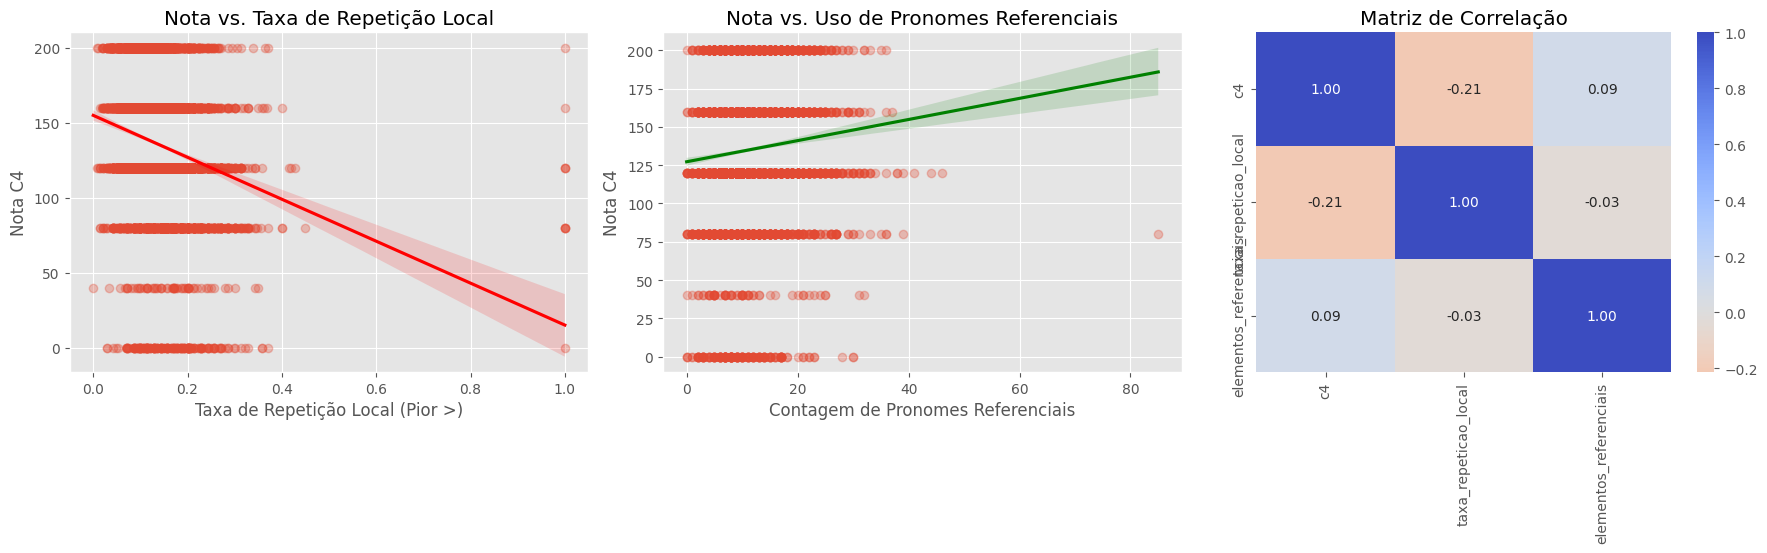

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from tqdm import tqdm
from collections import Counter

tqdm.pandas()
plt.style.use('ggplot')

if 'nlp' not in locals():
    try:
        nlp = spacy.load("pt_core_news_lg")
    except OSError:
        import subprocess
        subprocess.run(["python", "-m", "spacy", "download", "pt_core_news_lg"])
        nlp = spacy.load("pt_core_news_lg")

def analisar_qualidade_textual(texto):
    """
    Analisa a qualidade textual com base na repetição local e no uso de elementos referenciais.
    """
    doc = nlp(str(texto).lower())
    resultados = {}

    palavras_de_conteudo = [
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and token.pos_ in ['NOUN', 'VERB', 'ADJ', 'ADV']
    ]

    taxas_locais = []
    tamanho_janela = 70
    passo = 30

    if len(palavras_de_conteudo) > tamanho_janela:
        for i in range(0, len(palavras_de_conteudo) - tamanho_janela + 1, passo):
            janela = palavras_de_conteudo[i:i+tamanho_janela]
            taxa_na_janela = 1 - (len(set(janela)) / len(janela))
            taxas_locais.append(taxa_na_janela)

        resultados['taxa_repeticao_local'] = np.mean(taxas_locais) if taxas_locais else 0
    else:
        if len(palavras_de_conteudo) > 0:
            resultados['taxa_repeticao_local'] = 1 - (len(set(palavras_de_conteudo)) / len(palavras_de_conteudo))
        else:
            resultados['taxa_repeticao_local'] = 1.0

    contagem_referenciais = 0
    tipos_pronomes_referenciais = ['Prs', 'Dem', 'Rel']
    for token in doc:
        if token.pos_ == 'PRON' and any(f'PronType={pt}' in token.morph for pt in tipos_pronomes_referenciais):
            contagem_referenciais += 1
    resultados['elementos_referenciais'] = contagem_referenciais

    return pd.Series(resultados)


def visualizar_analise_qualidade(df_analisado):
    """
    Gera visualizações para as métricas de qualidade textual.
    """
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    sns.regplot(x='taxa_repeticao_local', y='c4', data=df_analisado,
                scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    plt.title('Nota vs. Taxa de Repetição Local')
    plt.xlabel('Taxa de Repetição Local (Pior >)')
    plt.ylabel('Nota C4')

    plt.subplot(1, 3, 2)
    sns.regplot(x='elementos_referenciais', y='c4', data=df_analisado,
                scatter_kws={'alpha':0.3}, line_kws={'color':'green'})
    plt.title('Nota vs. Uso de Pronomes Referenciais')
    plt.xlabel('Contagem de Pronomes Referenciais')
    plt.ylabel('Nota C4')

    plt.subplot(1, 3, 3)
    cols_corr = ['c4', 'taxa_repeticao_local', 'elementos_referenciais']
    sns.heatmap(df_analisado[cols_corr].corr(), annot=True, fmt='.2f', cmap='coolwarm_r', center=0)
    plt.title('Matriz de Correlação')

    plt.tight_layout(rect=[0, 0, 1, 0.94])
    plt.show()

df_amostra, _ = train_test_split(df_redacoes, train_size=6000, stratify=df_redacoes['c4'], random_state=42)
df_amostra['essay'] = df_amostra['essay'].fillna('').astype(str).str.strip("[]'\"")
print(f"Amostra de {len(df_amostra)} redações criada e preparada.")

df_resultados_novos = df_amostra['essay'].progress_apply(analisar_qualidade_textual)
df_analise_final = df_amostra.join(df_resultados_novos)
visualizar_analise_qualidade(df_analise_final)

O resultado dessa analise indica:

*  A repetição de palavras em trechos curtos é prejudicial, pois apresentou uma correlação negativa de -0.21 com a nota. Isso significa que, quanto mais o autor do texto insiste nos mesmos termos de conteúdo (substantivos, verbos) em frases próximas, menor tende a ser sua nota.

*  Com menor força, a análise mostrou que o uso de elementos referenciais (pronomes que retomam ideias) possui uma correlação muito baixa de 0.09 (praticamente irrelevante) com a nota.

# Estrutura Paragrafal

Agora é feita uma investigação da estrutura macro das redações para entender como a organização em parágrafos se correlaciona com a nota da Competência 4. A análise é focada em:
*  Contar o número total de parágrafos, para verificar se existe um padrão quantitativo associado às notas.
*  Calcular o tamanho médio de cada parágrafo (em palavras), sendo um indicador de desenvolvimento das ideias.
*  Medir o desvio padrão do tamanho dos parágrafos para avaliar o equilíbrio e a proporção entre as partes do texto.

100%|██████████| 6000/6000 [00:01<00:00, 3623.90it/s]



Resultado da Análise (primeiras 5 linhas da amostra):
       c4  score  num_paragrafos  tamanho_medio_paragrafo
4425  200    920             4.0                   114.00
2743  160    680             4.0                    84.25
2360  120    640             4.0                    86.25
3492  120    720             4.0                    63.25
1091  120    520             4.0                    70.75

Matriz de Correlação:
                               c4     score  num_paragrafos  \
c4                       1.000000  0.905624        0.040760   
score                    0.905624  1.000000        0.052151   
num_paragrafos           0.040760  0.052151        1.000000   
tamanho_medio_paragrafo  0.197539  0.214078       -0.459688   
desvio_padrao_tamanho   -0.064762 -0.053016       -0.019481   

                         tamanho_medio_paragrafo  desvio_padrao_tamanho  
c4                                      0.197539              -0.064762  
score                                   0.21407

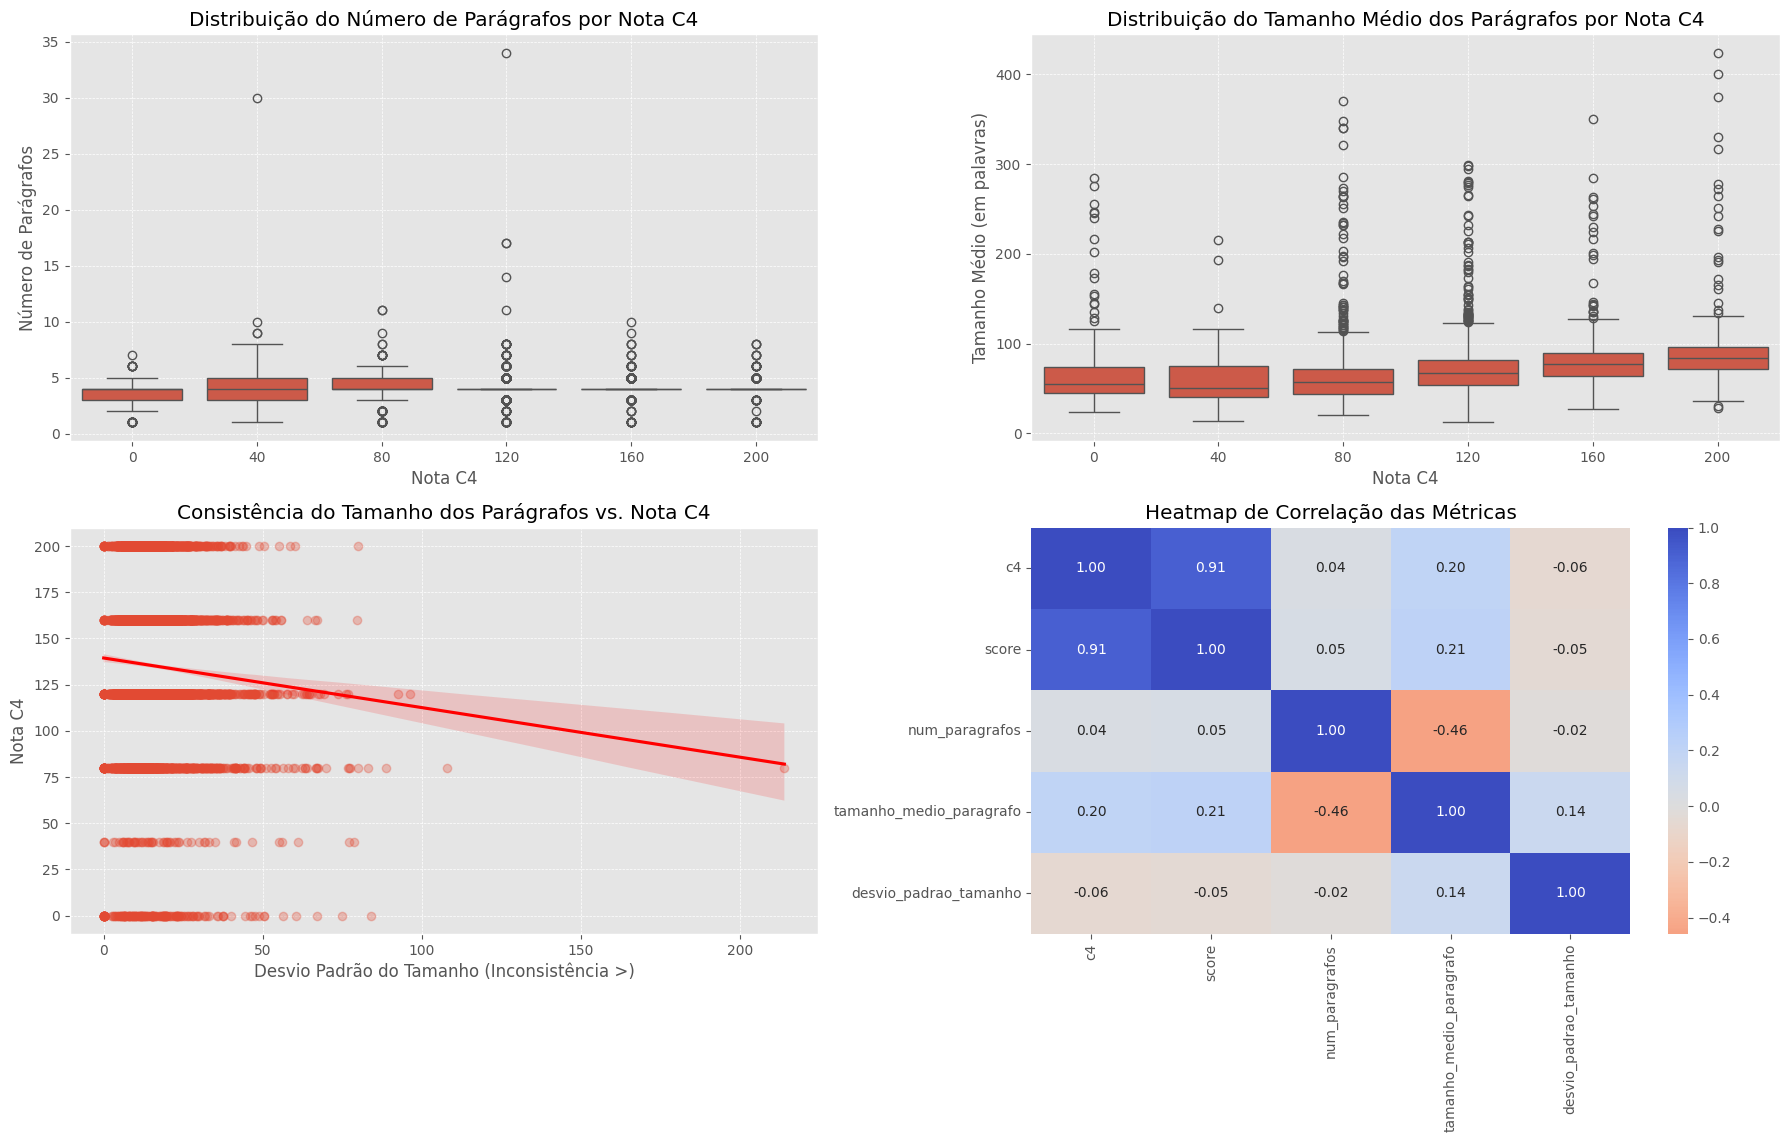

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import warnings
import ast

warnings.filterwarnings('ignore', category=FutureWarning)
tqdm.pandas()
plt.style.use('ggplot')

def analisar_paragrafos(lista_paragrafos: list) -> pd.Series:
    """
    Analisa uma lista de parágrafos de uma redação e extrai métricas estruturais.
    Recebe uma lista de strings, onde cada string é um parágrafo.
    """
    if not isinstance(lista_paragrafos, list) or not lista_paragrafos:
        return pd.Series({
            'num_paragrafos': 0,
            'tamanho_medio_paragrafo': 0,
            'desvio_padrao_tamanho': 0
        })

    num_paragrafos = len(lista_paragrafos)

    tamanhos_paragrafos = [len(p.split()) for p in lista_paragrafos]

    tamanho_medio = np.mean(tamanhos_paragrafos) if tamanhos_paragrafos else 0
    desvio_padrao = np.std(tamanhos_paragrafos) if tamanhos_paragrafos else 0

    return pd.Series({
        'num_paragrafos': num_paragrafos,
        'tamanho_medio_paragrafo': tamanho_medio,
        'desvio_padrao_tamanho': desvio_padrao
    })

def visualizar_analise_paragrafos(df_analisado: pd.DataFrame):
    """
    Gera e exibe gráficos e estatísticas descritivas para visualizar a relação
    entre as métricas de parágrafo e as notas.
    """
    df_plot = df_analisado[df_analisado['num_paragrafos'] > 0]

    cols_corr = ['c4', 'score', 'num_paragrafos', 'tamanho_medio_paragrafo', 'desvio_padrao_tamanho']
    correlacao = df_plot[cols_corr].corr()
    print("\nMatriz de Correlação:")
    print(correlacao)

    stats_num_paragrafos = df_plot.groupby('c4')['num_paragrafos'].describe()
    print(stats_num_paragrafos)

    stats_tamanho_paragrafos = df_plot.groupby('c4')['tamanho_medio_paragrafo'].describe()
    print(stats_tamanho_paragrafos)

    plt.figure(figsize=(18, 12))
    plt.subplot(2, 2, 1)
    sns.boxplot(x='c4', y='num_paragrafos', data=df_plot)
    plt.title('Distribuição do Número de Parágrafos por Nota C4')
    plt.xlabel('Nota C4')
    plt.ylabel('Número de Parágrafos')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.subplot(2, 2, 2)
    sns.boxplot(x='c4', y='tamanho_medio_paragrafo', data=df_plot)
    plt.title('Distribuição do Tamanho Médio dos Parágrafos por Nota C4')
    plt.xlabel('Nota C4')
    plt.ylabel('Tamanho Médio (em palavras)')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.subplot(2, 2, 3)
    sns.regplot(x='desvio_padrao_tamanho', y='c4', data=df_plot,
                scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
    plt.title('Consistência do Tamanho dos Parágrafos vs. Nota C4')
    plt.xlabel('Desvio Padrão do Tamanho (Inconsistência >)')
    plt.ylabel('Nota C4')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.subplot(2, 2, 4)
    sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm_r', center=0)
    plt.title('Heatmap de Correlação das Métricas')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

df_amostra, _ = train_test_split(df_redacoes, train_size=6000, stratify=df_redacoes['c4'], random_state=42)

def safe_literal_eval(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return []

df_amostra['essay_list'] = df_amostra['essay'].apply(safe_literal_eval)

resultados_paragrafos = df_amostra['essay_list'].progress_apply(analisar_paragrafos)
df_final_paragrafos = df_amostra.join(resultados_paragrafos)

print("\nResultado da Análise (primeiras 5 linhas da amostra):")
print(df_final_paragrafos[['c4', 'score', 'num_paragrafos', 'tamanho_medio_paragrafo']].head())

visualizar_analise_paragrafos(df_final_paragrafos)

Podemos analisar que a correlação entre o número de parágrafos e a nota é de apenas 0.04, um valor insignificante. As tabelas mostram que a média e a mediana de parágrafos para todas as faixas de nota cravam em 4.

A correlação do tamanho médio do parágrafo com a nota é mais evidente, porém fraca, chegando a 0.20.

Observando o gráfico de distribuição do número de parágrafos por nota, as caixas para as notas 160 e 200 são "compactas" e têm pouquíssimos *outliers*. A grande maioria das redações se concentra massivamente entre 4 e 5 parágrafos e  o desvio padrão para essas notas é muito baixo (0.6).

In [ ]:
import pandas as pd

def mostrar_redacao(row):
    """Recebe uma linha do DataFrame e imprime a redação formatada."""
    print(f"ID da Redação (Índice): {row.name}")
    print(f"Nota C4: {row['c4']} | Score Total: {row['score']}")
    print(f"Número de Parágrafos: {int(row['num_paragrafos'])}")

    paragrafos = row['essay_list']

    if isinstance(paragrafos, list) and paragrafos:
        for i, p_texto in enumerate(paragrafos, 1):
            print(f"Parágrafo {i}:\n{p_texto}\n")
    else:
        print("Conteúdo da redação não disponível ou em formato inesperado.")

if 'df_final_paragrafos' in locals():
    df_validas = df_final_paragrafos[df_final_paragrafos['num_paragrafos'] > 0].copy()

    if not df_validas.empty:
        max_paragrafos = int(df_validas['num_paragrafos'].max())
        print(f"O número máximo de parágrafos encontrado foi: {max_paragrafos}\n")

        for n_paragrafos in range(max_paragrafos, 0, -1):
            redacoes_encontradas = df_validas[df_validas['num_paragrafos'] == n_paragrafos]

            if not redacoes_encontradas.empty:
                print(f"\nExemplo de Redação com {n_paragrafos} parágrafo(s):")

                exemplo_para_mostrar = redacoes_encontradas.iloc[0]
                mostrar_redacao(exemplo_para_mostrar)
            else:
                pass

    else:
        print("Nenhuma redação válida encontrada para exibir.")

else:
    print("Por favor, execute o script de análise de parágrafos completo primeiro.")

O número máximo de parágrafos encontrado foi: 34


Exemplo de Redação com 34 parágrafo(s):
ID da Redação (Índice): 1469
Nota C4: 120 | Score Total: 560
Número de Parágrafos: 34
Parágrafo 1:
José de Alencar e outros autores do romance indianista nos fizeram conhecer e

Parágrafo 2:
entender a relação do índio com a natureza: subsistência, exploração saudável

Parágrafo 3:
e freada, cooperação. Esse modo de se utilizar da fauna e da flora, no entanto,

Parágrafo 4:
não é o mais prevalecente no mundo, já que o homem, desde muito antes

Parágrafo 5:
de essas histórias serem contadas, tm para si duas únicas palavras-chave:

Parágrafo 6:
desenvolvimento e lucro. A fim de satisfazer essas necessidades inventadas,

Parágrafo 7:
viemos  explorando, desenfreada e irresponsavelmente, a natureza, sem

Parágrafo 8:
pensar que – um dia – a humanidade pode ser engolida por essas ações, como

Parágrafo 9:
recentes acontecimentos vêm sugerindo.

Parágrafo 10:
Primeiramente, é preciso compreender de que

Porém, ao analisarmos profundamente a formatação dos dados do *dataset*, é notório que algumas redações com um número elevado de parágrafos não foram formatadas corretamente (já que a fonte de dados está separando as redações em parágrafos, e a contagem deles foi feita a partir dessa separação). Então isso justifica os *outliers*.

#Avaliador

Com base na análise foi desenvolvido um avaliador. Este sistema quantifica as características textuais que a análise de dados revelou serem mais correlacionadas com as notas. A primeira função do sistema extrai métricas quantitativas fundamentais. Para cada texto, o código realiza as seguintes medições:

*  Tamanho Médio do Parágrafo: Calcula o comprimento médio dos parágrafos como um indicador do nível de desenvolvimento das ideias.
*  Quantidade e Diversidade de Conectivos: Mede tanto o número total de conectivos utilizados quanto a variedade (quantos conectivos únicos foram empregados).
*  Repetição Local de Palavras: Utiliza uma "janela deslizante" para contar a repetição de palavras de conteúdo (substantivos, verbos, adjetivos) em trechos curtos, penalizando a insistência nos mesmos termos em frases próximas.
*  Mecanismos de Referenciação: Distingue o uso de pronomes para retomada de ideias (anáfora), que conectam com o que já foi dito, e para antecipação de informações (catáfora), que introduzem o que ainda será dito.

A segunda função atua convertendo esses números em uma nota final. O sistema primeiro aplica regras de corte para desqualificar ou atribuir notas muito baixas a textos que não atendem a requisitos mínimos, como um número mínimo de palavras ou uma diversidade mínima de conectivos. Para as redações que passam pelos filtros, é aplicado um sistema de pontos que pondera cada métrica de acordo com sua importância, revelada na análise de dados:

*  Diversidade de Conectivos: É o critério com maior peso, premiando o uso de um repertório variado de operadores argumentativos.
*  Profundidade: Concede pontos para parágrafos mais longos, indicando um melhor desenvolvimento das ideias.
*  Riqueza Vocabular: Penaliza diretamente o número de repetições locais encontradas na "janela deslizante", incentivando a fluidez lexical.
*  Coesão Referencial: Concede pontos de forma distinta para o uso de elementos de retomada (anáfora) e de antecipação (catáfora).
*  Quantidade de Conectivos: Concede pontos com base no volume total de conectivos.

100%|██████████| 6000/6000 [08:28<00:00, 11.80it/s]




--- Análise de Desempenho da Avaliação ---

Quantidade de Acertos: 1627 de 6000
Taxa de Acerto (nota exata): 27.12%
Taxa de Acerto com margem de 1 nível de nota (±40 pontos): 71.83%


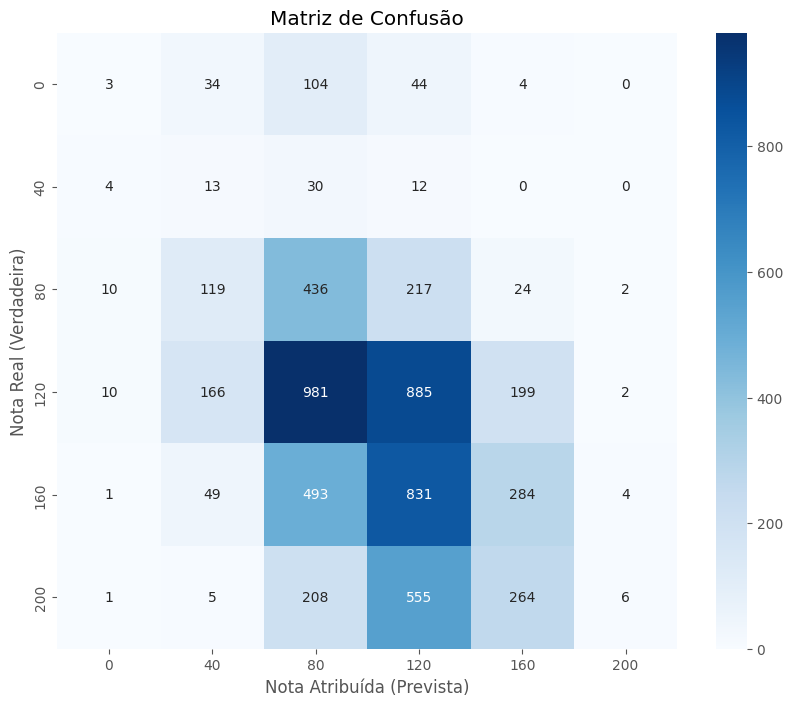

In [ ]:
import pandas as pd
import numpy as np
import spacy
import re
import ast
import warnings
from collections import defaultdict, Counter
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore', category=FutureWarning)
pd.set_option('display.max_colwidth', 200)
tqdm.pandas()

nlp = spacy.load("pt_core_news_lg")

def analisar_redacao(texto: str) -> dict:
    """
    Analisa a redação para extrair métricas de coesão,
    focando em repetição local, conectivos e mecanismos de referenciação.
    """
    metricas = {}

    try:
        paragrafos_lista = ast.literal_eval(str(texto))
        if not isinstance(paragrafos_lista, list): raise ValueError
    except (ValueError, SyntaxError):
        paragrafos_lista = str(texto).split('\n\n')

    texto_completo = " ".join(p for p in paragrafos_lista if p)
    metricas['total_palavras'] = len(texto_completo.split())

    if not texto_completo or metricas['total_palavras'] < 50:
        return {
            'total_palavras': metricas.get('total_palavras', 0), 'tamanho_medio_paragrafo': 0,
            'repeticoes_locais': 100, 'elementos_retomada': 0, 'elementos_antecipacao': 0,
            'total_conectivos': 0, 'diversidade_conectivos': 0
        }

    doc = nlp(texto_completo.lower())

    tamanhos = [len(p.split()) for p in paragrafos_lista if p]
    metricas['tamanho_medio_paragrafo'] = np.mean(tamanhos) if tamanhos else 0

    JANELA_REPETICAO = 50
    palavras_conteudo = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.pos_ in ['NOUN', 'VERB', 'ADJ']]
    repeticoes_locais = 0
    for i, palavra in enumerate(palavras_conteudo):
        janela = palavras_conteudo[i+1 : i + 1 + JANELA_REPETICAO]
        if palavra in janela:
            repeticoes_locais += 1
    metricas['repeticoes_locais'] = repeticoes_locais

    elementos_retomada = 0
    elementos_antecipacao = 0
    for token in doc:
        if token.pos_ == 'PRON':
            lemma = token.lemma_.lower()
            if token.morph.get("PronType") in [['Prs'], ['Rel']] or lemma in ['esse', 'aquele', 'cujo', 'qual']:
                elementos_retomada += 1
            elif lemma in ['este', 'isto']:
                elementos_antecipacao += 1
    metricas['elementos_retomada'] = elementos_retomada
    metricas['elementos_antecipacao'] = elementos_antecipacao

    conectivos_encontrados = []
    texto_processado = texto_completo.lower()
    for conectivo in sorted(conectivos_alvo, key=len, reverse=True):
        matches = re.findall(r'\b' + re.escape(conectivo) + r'\b', texto_processado)
        if matches:
            conectivos_encontrados.extend([conectivo] * len(matches))
            texto_processado = re.sub(r'\b' + re.escape(conectivo) + r'\b', '', texto_processado)

    metricas['total_conectivos'] = len(conectivos_encontrados)
    metricas['diversidade_conectivos'] = len(set(conectivos_encontrados))

    return metricas

def avaliador(texto: str):
    """
    Avalia a redação com base em um sistema de pontos.
    """
    metricas = analisar_redacao(texto)

    total_palavras = metricas.get('total_palavras', 0)
    diversidade = metricas.get('diversidade_conectivos', 0)
    total_conectivos = metricas.get('total_conectivos', 0)

    if total_palavras < 100:
        return 0, 0, {"Motivo": "Texto muito curto"}, metricas
    if total_palavras < 180 and diversidade < 5:
        return 40, 15, {"Motivo": "Baixa diversidade de conectivos em texto relativamente curto"}, metricas
    if diversidade < 4 or total_conectivos < 5:
        return 80, 25, {"Motivo": "Uso precário de conectivos"}, metricas

    pontos = {}

    tmp = metricas.get('tamanho_medio_paragrafo', 0)
    if tmp > 75: pontos['Profundidade'] = 20
    elif tmp > 65: pontos['Profundidade'] = 15
    elif tmp > 50: pontos['Profundidade'] = 10
    else: pontos['Profundidade'] = 5

    repeticoes = metricas.get('repeticoes_locais', 100)
    pontos['Riqueza Vocabular'] = max(0, 20 - round(repeticoes / 1.5))

    retomada = metricas.get('elementos_retomada', 0)
    antecipacao = metricas.get('elementos_antecipacao', 0)
    pontos_retomada = min(10, retomada)
    pontos_antecipacao = min(5, antecipacao * 2)
    pontos['Coesão Referencial'] = pontos_retomada + pontos_antecipacao

    if total_conectivos > 18: pontos['Qtd. Conectivos'] = 15
    elif total_conectivos > 14: pontos['Qtd. Conectivos'] = 12
    elif total_conectivos > 10: pontos['Qtd. Conectivos'] = 8
    elif total_conectivos > 6: pontos['Qtd. Conectivos'] = 4
    else: pontos['Qtd. Conectivos'] = 0

    if diversidade > 14: pontos['Diversidade Conectivos'] = 30
    elif diversidade > 11: pontos['Diversidade Conectivos'] = 25
    elif diversidade > 8: pontos['Diversidade Conectivos'] = 20
    elif diversidade > 5: pontos['Diversidade Conectivos'] = 15
    else: pontos['Diversidade Conectivos'] = 10

    pontuacao_total = sum(pontos.values())

    if pontuacao_total >= 88:
        nota_final = 200
    elif pontuacao_total >= 75:
        nota_final = 160
    elif pontuacao_total >= 55:
        nota_final = 120
    elif pontuacao_total >= 35:
        nota_final = 80
    else:
        nota_final = 40

    return nota_final, pontuacao_total, pontos, metricas

if 'df_redacoes' in locals() and 'categorias_conectivos' in locals() and 'nlp' in locals():
    df_teste, _ = train_test_split(
        df_redacoes, train_size=6000, stratify=df_redacoes['c4'], random_state=101
    )
    resultados_avaliacao = df_teste['essay'].progress_apply(avaliador)

    resultados_df = pd.DataFrame(
        resultados_avaliacao.tolist(),
        index=df_teste.index,
        columns=['nota_atribuida', 'pontuacao_calculada', 'pontos_detalhados', 'metricas']
    )
    df_comparativo = df_teste.join(resultados_df)

    print("\n\n--- Análise de Desempenho da Avaliação ---\n")

    acertos = (df_comparativo['c4'] == df_comparativo['nota_atribuida']).sum()
    total_avaliado = len(df_comparativo)
    taxa_acerto = (acertos / total_avaliado) * 100

    print(f"Quantidade de Acertos: {acertos} de {total_avaliado}")
    print(f"Taxa de Acerto (nota exata): {taxa_acerto:.2f}%")

    diferenca_um_nivel = (df_comparativo['c4'] - df_comparativo['nota_atribuida']).abs() <= 40
    taxa_acerto_flexivel = (diferenca_um_nivel.sum() / total_avaliado) * 100
    print(f"Taxa de Acerto com margem de 1 nível de nota (±40 pontos): {taxa_acerto_flexivel:.2f}%")

    y_true = df_comparativo['c4']
    y_pred = df_comparativo['nota_atribuida']
    labels = sorted(list(set(y_true) | set(y_pred)))
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=labels,
        yticklabels=labels
    )
    plt.title('Matriz de Confusão')
    plt.ylabel('Nota Real (Verdadeira)')
    plt.xlabel('Nota Atribuída (Prevista)')
    plt.show()

else:
    print("Por favor, carregue 'df_redacoes', 'categorias_conectivos' e o modelo 'nlp' antes de executar este script.")

Os resultados indicam dificuldade no avaliador na distinção fina entre as notas 80, 120 e 160. A matriz revela que:
*  Muitas redações de nota 120 são rebaixadas para 80.
*  Muitas redações de nota 160 são rebaixadas para 120.

Há uma forte tendência em não reconhecer redações de nota 200:
*  Das redações que realmente valiam a nota máxima, poucas foram corretamente classificada. A grande maioria foi avaliada como 120.

O avaliador também tende a superestimar as redações mais fracas. Redações de nota 0 e 40 são frequentemente confundidas com a nota 80, sugerindo que o sistema não penaliza com o rigor necessário as deficiências mais graves.

Para testagem, avaliador a seguir adota uma abordagem um pouco diferente do modelo anterior. A mudança proposta para está na forma de medir o vocabulário. O sistema calcula a taxa de repetição geral, que avalia a proporção de palavras únicas em todo o texto para medir a riqueza vocabular.

A análise de elementos de retomada e antecipação mede o volume total de pronomes coesivos e atribui um bônus se a quantidade for alta. Agora, além de medir o tamanho médio dos parágrafos, é também avaliada a consistência entre eles, utilizando o desvio padrão para pontuar a harmonia estrutural do texto e a pontuação de conectivos é feita unicamente para a diversidade, removendo a pontuação o total de conectivos.

100%|██████████| 6000/6000 [11:34<00:00,  8.64it/s]




--- Análise de Desempenho da Avaliação (Otimizado) ---

Quantidade de Acertos: 2304 de 6000
Taxa de Acerto (nota exata): 38.40%
Taxa de Acerto com margem de 1 nível de nota (±40 pontos): 85.22%


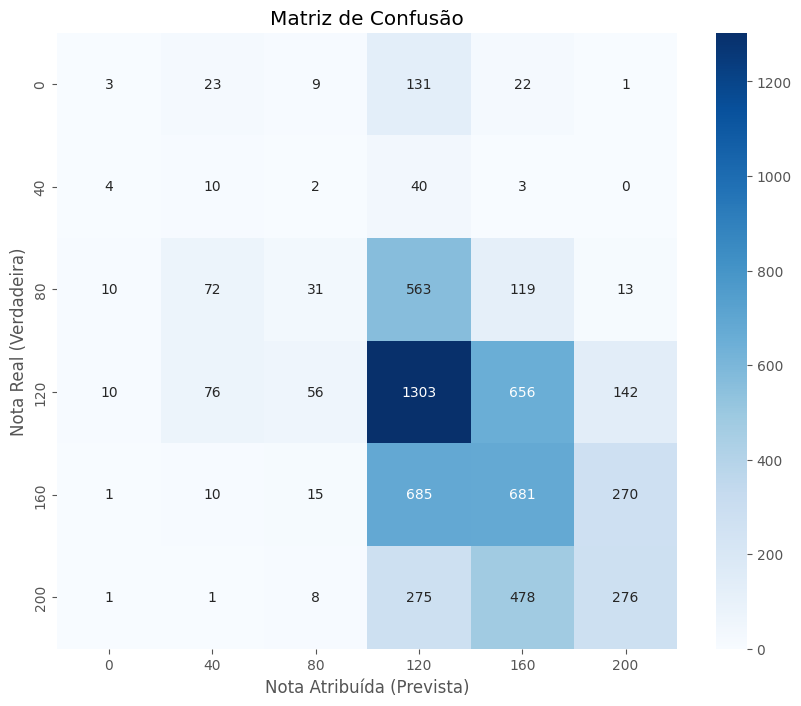

In [ ]:
import ast
import re
import warnings
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import spacy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tqdm import tqdm

warnings.filterwarnings('ignore', category=FutureWarning)
pd.set_option('display.max_colwidth', 200)
tqdm.pandas()

nlp = spacy.load("pt_core_news_lg")

def analisar_redacao_para_avaliacao(texto: str) -> dict:
    """
    Analisa a redação para extrair métricas de coesão e estrutura.
    """
    metricas = {}
    try:
        paragrafos_lista = ast.literal_eval(str(texto))
        if not isinstance(paragrafos_lista, list):
            raise ValueError
    except (ValueError, SyntaxError):
        paragrafos_lista = str(texto).split('\n\n')

    texto_completo = " ".join(p for p in paragrafos_lista if p)
    metricas['total_palavras'] = len(texto_completo.split())

    if not texto_completo:
        return {
            **metricas,
            'num_paragrafos': 0,
            'tamanho_medio_paragrafo': 0,
            'desvio_padrao_tamanho': 0,
            'taxa_repeticao_geral': 1.0,
            'elementos_referenciais': 0,
            'total_conectivos': 0,
            'diversidade_conectivos': 0
        }

    doc = nlp(texto_completo.lower())

    metricas['num_paragrafos'] = len(paragrafos_lista)
    tamanhos = [len(p.split()) for p in paragrafos_lista]
    metricas['tamanho_medio_paragrafo'] = np.mean(tamanhos) if tamanhos else 0
    metricas['desvio_padrao_tamanho'] = np.std(tamanhos) if tamanhos else 0

    palavras_conteudo = [
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and token.pos_ in ['NOUN', 'VERB', 'ADJ']
    ]
    metricas['taxa_repeticao_geral'] = (
        1 - (len(set(palavras_conteudo)) / len(palavras_conteudo)) if len(palavras_conteudo) > 0 else 1.0
    )
    metricas['elementos_referenciais'] = len(
        [token for token in doc if token.pos_ == 'PRON' and any(f'PronType={pt}' in token.morph for pt in ['Prs', 'Dem', 'Rel'])]
    )

    conectivos_encontrados = []
    texto_processado = texto_completo.lower()
    for conectivo in sorted(conectivos_alvo, key=len, reverse=True):
        matches = re.findall(r'\b' + re.escape(conectivo) + r'\b', texto_processado)
        if matches:
            conectivos_encontrados.extend([conectivo] * len(matches))
            texto_processado = texto_processado.replace(conectivo, "")

    metricas['total_conectivos'] = len(conectivos_encontrados)
    metricas['diversidade_conectivos'] = len(set(conectivos_encontrados))

    return metricas


def avaliador_otimizado_por_pontos(texto: str):
    """
    Avalia a redação com base em um sistema de pontos.
    """
    metricas = analisar_redacao_para_avaliacao(texto)

    total_palavras = metricas.get('total_palavras', 0)
    diversidade = metricas.get('diversidade_conectivos', 0)

    if total_palavras < 100:
        return 0, 5, {}, metricas
    if total_palavras < 180 and diversidade < 5:
        return 40, 15, {}, metricas
    if diversidade < 4:
        return 80, 25, {}, metricas

    pontos = {}

    tmp = metricas.get('tamanho_medio_paragrafo', 0)
    if tmp > 80:
        pontos['Profundidade'] = 25
    elif tmp > 70:
        pontos['Profundidade'] = 20
    elif tmp > 60:
        pontos['Profundidade'] = 15
    elif tmp > 45:
        pontos['Profundidade'] = 10
    else:
        pontos['Profundidade'] = 5

    dpt = metricas.get('desvio_padrao_tamanho', 100)
    if dpt < 25:
        pontos['Equilíbrio'] = 15
    elif dpt < 35:
        pontos['Equilíbrio'] = 10
    elif dpt < 50:
        pontos['Equilíbrio'] = 5
    else:
        pontos['Equilíbrio'] = 0

    trg = metricas.get('taxa_repeticao_geral', 1.0)
    pontos['Riqueza Vocabular'] = round((1 - trg) * 25)

    er = metricas.get('elementos_referenciais', 0)
    if er > 15:
        pontos['Uso de Pronomes'] = 5
    else:
        pontos['Uso de Pronomes'] = 0

    if diversidade > 14:
        pontos['Diversidade Conectivos'] = 30
    elif diversidade > 11:
        pontos['Diversidade Conectivos'] = 25
    elif diversidade > 8:
        pontos['Diversidade Conectivos'] = 20
    elif diversidade > 5:
        pontos['Diversidade Conectivos'] = 15
    else:
        pontos['Diversidade Conectivos'] = 10

    pontuacao_total = sum(pontos.values())

    if pontuacao_total >= 88:
        nota_final = 200
    elif pontuacao_total >= 75:
        nota_final = 160
    elif pontuacao_total >= 50:
        nota_final = 120
    elif pontuacao_total >= 30:
        nota_final = 80
    else:
        nota_final = 40

    return nota_final, pontuacao_total, pontos, metricas

if 'df_redacoes' in locals() and 'categorias_conectivos' in locals():
    df_teste, _ = train_test_split(
        df_redacoes, train_size=6000, stratify=df_redacoes['c4'], random_state=101
    )
    resultados_avaliacao = df_teste['essay'].progress_apply(avaliador_otimizado_por_pontos)

    resultados_df = pd.DataFrame(
        resultados_avaliacao.tolist(),
        index=df_teste.index,
        columns=['nota_atribuida', 'pontuacao_calculada', 'pontos_detalhados', 'metricas']
    )
    df_comparativo = df_teste.join(resultados_df)

    print("\n\n--- Análise de Desempenho da Avaliação (Otimizado) ---\n")
    acertos = (df_comparativo['c4'] == df_comparativo['nota_atribuida']).sum()
    total_avaliado = len(df_comparativo)
    taxa_acerto = (acertos / total_avaliado) * 100

    print(f"Quantidade de Acertos: {acertos} de {total_avaliado}")
    print(f"Taxa de Acerto (nota exata): {taxa_acerto:.2f}%")

    diferenca_um_nivel = (df_comparativo['c4'] - df_comparativo['nota_atribuida']).abs() <= 40
    taxa_acerto_flexivel = (diferenca_um_nivel.sum() / total_avaliado) * 100
    print(f"Taxa de Acerto com margem de 1 nível de nota (±40 pontos): {taxa_acerto_flexivel:.2f}%")

    y_true = df_comparativo['c4']
    y_pred = df_comparativo['nota_atribuida']
    labels = sorted(list(set(y_true) | set(y_pred)))
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=labels,
        yticklabels=labels
    )
    plt.title('Matriz de Confusão')
    plt.ylabel('Nota Real (Verdadeira)')
    plt.xlabel('Nota Atribuída (Prevista)')
    plt.show()

else:
    print("Por favor, carregue 'df_redacoes' e 'categorias_conectivos' antes de executar este script.")

Com base nos resultados apresentados, observa-se mais de 85% das previsões a apenas um nível de distância da nota real, mostrando que erros graves, como confundir uma redação de nota 200 com uma de 40, são baixos. Porém, a principal característica do modelo é sua forte tendência a classificar redações como 120, tendendo a superestimar redações mais fracas.

O maior desafio é diferenciar uma redação de nota 120 de uma de 160. Os erros são quase simétricos: rebaixou 685 redações de nota 160 para 120 e elevou 656 redações de nota 120 para 160. O modelo continua incapaz de identificar com precisão as notas 0 e 40, absorvendo-as quase que inteiramente na sua predição padrão de 120 pontos.

Para tentar resolver o problema dos avaliadores, este código substitui o sistema de pontos fixos por um modelo de Machine Learning preditivo. A nova abordagem "aprende" os padrões complexos que conectam as características de uma redação às suas notas, utilizando o algoritmo LightGBM, adicionando também novas features.

A base do modelo é um conjunto de características extraídas de forma estrutural. A análise é segmentada, onde a redação é primeiro dividida em suas quatro partes lógicas: introdução, desenvolvimento 1, desenvolvimento 2 e conclusão.

Para cada um desses segmentos, o sistema calcula um conjunto de métricas, como:
*  Métricas de Coesão: Densidade e diversidade de conectivos.
*  Métricas de Vocabulário: Taxa de repetição de palavras.
*  Métricas Estruturais: Contagem de palavras por parágrafo.

Além disso, o sistema analisa a coesão semântica, uma feature que usa os vetores de palavras do `spaCy` para calcular a similaridade de significado entre os parágrafos.

O LightGBM (Light Gradient Boosting Machine) é um modelo de ML baseado em árvores de decisão, ele funciona da seguinte forma:
*  Aprendizagem: O modelo analisa milhares de redações e suas respectivas notas, aprendendo quais combinações de features (ex: "baixa repetição na conclusão" + "alta similaridade entre D1 e D2") são os melhores indicadores para cada nível de nota (0, 40, 80, 120, 160, 200).
* Previsão: Uma vez treinado, ele consegue, ao receber as features de uma nova redação, prever a nota mais provável com base nos padrões que aprendeu.

Para garantir que o modelo seja preciso, o pipeline inclui etapas de otimização:
*  Balanceamento com SMOTE: Como algumas notas são mais raras que outras (ex: nota 0), a técnica SMOTE é usada para criar exemplos sintéticos das classes minoritárias.
*  Treinamento com *Early Stopping*: O modelo é treinado de forma iterativa e sua performance é constantemente validada. O treinamento para automaticamente no momento ideal, evitando o "superajuste" (overfitting).
*  Análise de Importância: Ao final, o sistema gera um gráfico mostrando quais das dezenas de features extraídas foram as mais importantes para sua tomada de decisão, permitindo entender o que mais influencia a nota da Competência 4.


--- Iniciando Pipeline Final Robusto (Modelo Único + Features Argumentativas) ---

Passo 1: Extraindo features argumentativas...



Passo 2: Preparando 24 features para treinamento...

Passo 3: Aplicando SMOTE para balancear os dados...

Passo 4: Treinando o modelo LightGBM único e otimizado...

Passo 5: Avaliando o modelo final...
Precisão (Accuracy) Final do Modelo: 42.27%
              precision    recall  f1-score   support

           0       0.17      0.08      0.11        48
          40       0.20      0.14      0.17        14
          80       0.27      0.16      0.20       200
         120       0.47      0.62      0.54       566
         160       0.39      0.32      0.35       410
         200       0.43      0.43      0.43       262

    accuracy                           0.42      1500
   macro avg       0.32      0.29      0.30      1500
weighted avg       0.40      0.42      0.40      1500



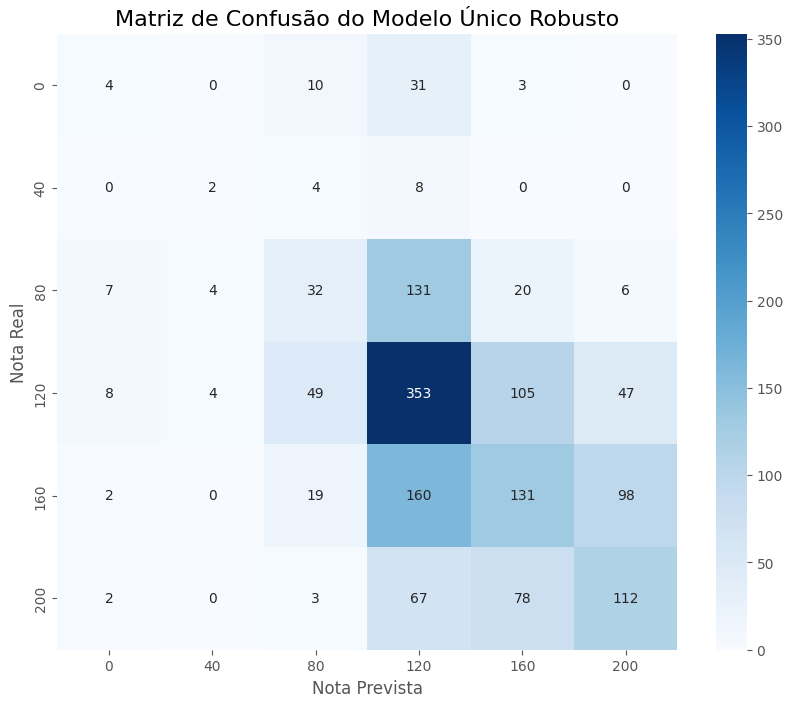


Passo 6: Salvando o modelo treinado...
Modelo salvo com sucesso em: modelo_c4_lgbm.joblib

--- Importância de Features ---
                             feature  importance
0                     palavras_intro        1155
5                        palavras_d1        1120
10                       palavras_d2        1006
15                palavras_conclusao         909
8                  taxa_repeticao_d1         821
22             similaridade_intro_d2         791
20                similaridade_d1_d2         791
3               taxa_repeticao_intro         754
21             similaridade_intro_d1         744
1         densidade_conectivos_intro         704
13                 taxa_repeticao_d2         703
16    densidade_conectivos_conclusao         648
11           densidade_conectivos_d2         646
2       diversidade_conectivos_intro         645
6            densidade_conectivos_d1         623
23     similaridade_desenv_conclusao         603
18          taxa_repeticao_conclusao       

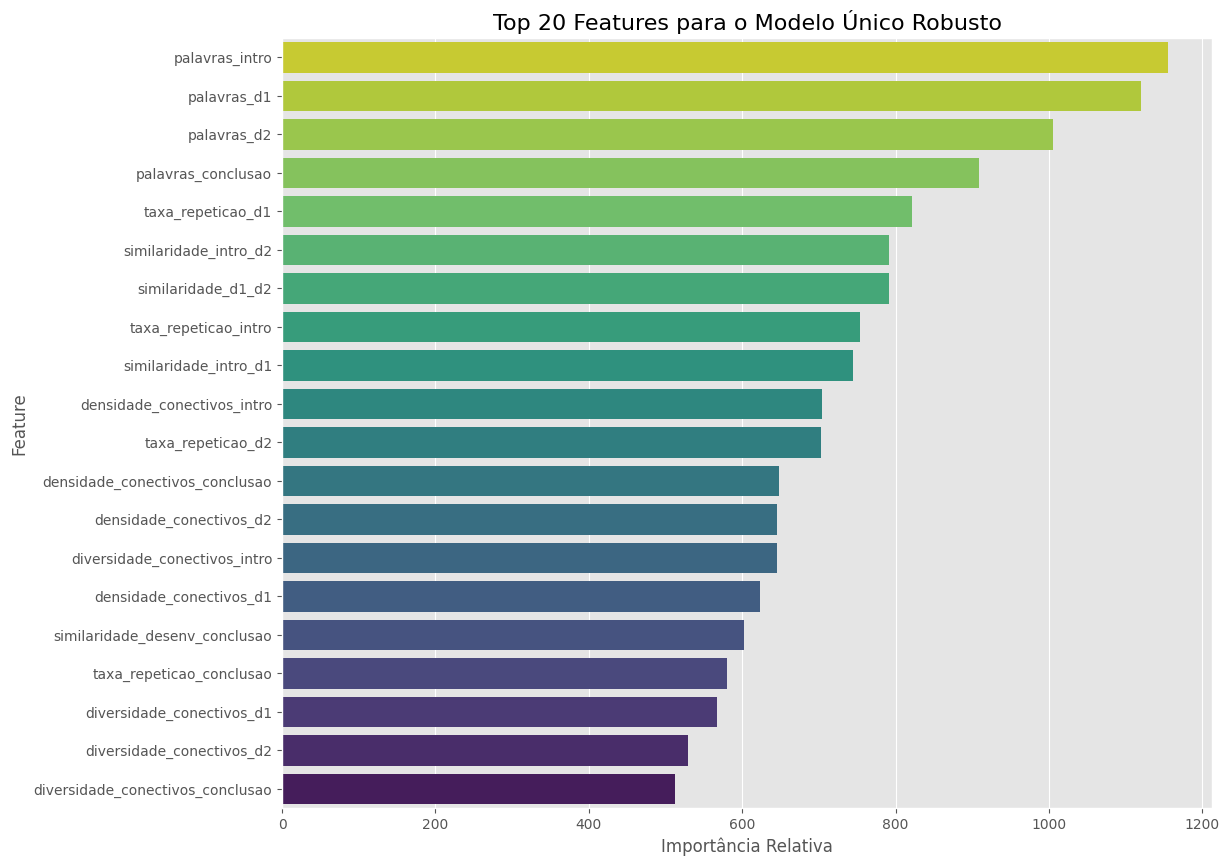

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from tqdm import tqdm
from collections import defaultdict
import ast
import re
import warnings
import joblib

nlp = spacy.load("pt_core_news_lg")

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from pandarallel import pandarallel

warnings.filterwarnings('ignore', category=FutureWarning)
tqdm.pandas()
plt.style.use('ggplot')
pandarallel.initialize(progress_bar=True, verbose=0)

if "conclusão" in categorias_conectivos and "cat_conclusao" not in categorias_conectivos:
    categorias_conectivos["cat_conclusao"] = categorias_conectivos.pop("conclusão")
conectivos_conclusao = set(categorias_conectivos.get('cat_conclusao', []))

def analisar_conectivos_para_ml(texto: str, todos_conectivos: list, conectivos_de_conclusao: set) -> dict:
    texto_lower = texto.lower()
    conectivos_encontrados = []
    for conectivo in sorted(todos_conectivos, key=len, reverse=True):
        matches = re.findall(r'\b' + re.escape(conectivo) + r'\b', texto_lower)
        if matches: conectivos_encontrados.extend([conectivo] * len(matches)); texto_lower = texto_lower.replace(conectivo, "")
    return {'total_conectivos': len(conectivos_encontrados), 'diversidade_conectivos': len(set(conectivos_encontrados)), 'usa_conectivo_conclusao': 1 if any(c in conectivos_de_conclusao for c in conectivos_encontrados) else 0}

def analisar_qualidade_textual(doc) -> dict:
    palavras_conteudo = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.pos_ in ['NOUN', 'VERB', 'ADJ']]
    taxa_repeticao = 1 - (len(set(palavras_conteudo)) / len(palavras_conteudo)) if len(palavras_conteudo) > 0 else 1.0
    return {'taxa_repeticao_geral': taxa_repeticao}

def segmentar_redacao(paragrafos_lista: list) -> dict:
    paragrafos_limpos = [p.strip() for p in paragrafos_lista if p.strip()]
    num_p_limpos = len(paragrafos_limpos)
    paragrafos_limpos.extend([''] * (4 - num_p_limpos))
    if num_p_limpos <= 4: return {'intro': paragrafos_limpos[0], 'd1': paragrafos_limpos[1], 'd2': paragrafos_limpos[2], 'conclusao': paragrafos_limpos[3]}
    else: return {'intro': paragrafos_limpos[0], 'd1': " ".join(paragrafos_limpos[1:-2]), 'd2': paragrafos_limpos[-2], 'conclusao': paragrafos_limpos[-1]}

def extrair_features_argumentativas(texto: str) -> pd.Series:
    try:
        paragrafos_lista = ast.literal_eval(str(texto))
        if not isinstance(paragrafos_lista, list): raise ValueError
    except (ValueError, SyntaxError):
        paragrafos_lista = str(texto).split('\n\n')
    segmentos = segmentar_redacao(paragrafos_lista)
    features_finais = {}
    docs_segmentos = {nome: nlp(texto_seg) for nome, texto_seg in segmentos.items()}
    for nome, doc_seg in docs_segmentos.items():
        total_palavras = len([t for t in doc_seg if not t.is_punct]); total_palavras = 1 if total_palavras == 0 else total_palavras
        conectivos = analisar_conectivos_para_ml(doc_seg.text, conectivos_alvo, conectivos_conclusao)
        qualidade = analisar_qualidade_textual(doc_seg)
        features_finais[f'palavras_{nome}'] = total_palavras; features_finais[f'densidade_conectivos_{nome}'] = conectivos['total_conectivos'] / total_palavras
        features_finais[f'diversidade_conectivos_{nome}'] = conectivos['diversidade_conectivos']; features_finais[f'taxa_repeticao_{nome}'] = qualidade['taxa_repeticao_geral']
        features_finais[f'usa_conectivo_conclusao_{nome}'] = conectivos['usa_conectivo_conclusao']
    doc_intro, doc_d1, doc_d2, doc_conclusao = docs_segmentos['intro'], docs_segmentos['d1'], docs_segmentos['d2'], docs_segmentos['conclusao']
    doc_desenvolvimento = nlp(doc_d1.text + " " + doc_d2.text)
    features_finais['similaridade_d1_d2'] = doc_d1.similarity(doc_d2) if doc_d1.vector_norm and doc_d2.vector_norm else 0
    features_finais['similaridade_intro_d1'] = doc_intro.similarity(doc_d1) if doc_intro.vector_norm and doc_d1.vector_norm else 0
    features_finais['similaridade_intro_d2'] = doc_intro.similarity(doc_d2) if doc_intro.vector_norm and doc_d2.vector_norm else 0
    features_finais['similaridade_desenv_conclusao'] = doc_desenvolvimento.similarity(doc_conclusao) if doc_desenvolvimento.vector_norm and doc_conclusao.vector_norm else 0
    return pd.Series(features_finais)

def plotar_matriz_confusao(y_true, y_pred, classes, title='Matriz de Confusão'):
    cm = confusion_matrix(y_true, y_pred, labels=classes); plt.figure(figsize=(10, 8)); sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title, fontsize=16); plt.ylabel('Nota Real', fontsize=12); plt.xlabel('Nota Prevista', fontsize=12); plt.show()

def main_pipeline_final_robusto(df_redacoes):
    print("\n--- Iniciando Pipeline Final Robusto (Modelo Único + Features Argumentativas) ---")

    print("\nPasso 1: Extraindo features argumentativas...")
    df_amostra = df_redacoes.sample(n=min(6000, len(df_redacoes)), random_state=42)
    df_amostra['essay'] = df_amostra['essay'].fillna('').astype(str)
    df_features = df_amostra['essay'].parallel_apply(extrair_features_argumentativas)
    df_super = df_amostra.join(df_features).fillna(0)

    features = list(df_features.columns)
    print(f"\nPasso 2: Preparando {len(features)} features para treinamento...")
    X = df_super[features]
    y = df_super['c4']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

    print("\nPasso 3: Aplicando SMOTE para balancear os dados...")
    smote = SMOTE(random_state=42, k_neighbors=3)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    print("\nPasso 4: Treinando o modelo LightGBM único e otimizado...")
    params = {
        'objective': 'multiclass',
        'num_class': y_train_resampled.nunique(),
        'metric': 'multi_logloss',
        'n_estimators': 1000,
        'learning_rate': 0.05,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'bagging_freq': 1,
        'lambda_l1': 0.1,
        'lambda_l2': 0.1,
        'num_leaves': 31,
        'verbose': -1,
        'n_jobs': -1,
        'seed': 42,
        'boosting_type': 'gbdt',
        'class_weight': 'balanced',
    }

    model = lgb.LGBMClassifier(**params)

    model.fit(X_train_resampled, y_train_resampled,
              eval_set=[(X_test, y_test)],
              eval_metric='multi_logloss',
              callbacks=[lgb.early_stopping(100, verbose=False)])

    print("\nPasso 5: Avaliando o modelo final...")
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    labels_ordenados = sorted(y.unique())

    print(f"Precisão (Accuracy) Final do Modelo: {accuracy:.2%}")
    print(classification_report(y_test, y_pred, labels=labels_ordenados, target_names=[str(n) for n in labels_ordenados], zero_division=0))
    plotar_matriz_confusao(y_test, y_pred, classes=labels_ordenados, title='Matriz de Confusão do Modelo Único Robusto')

    print("\nPasso 6: Salvando o modelo treinado...")
    nome_do_arquivo = 'modelo_c4_lgbm.joblib'
    joblib.dump(model, nome_do_arquivo)
    print(f"Modelo salvo com sucesso em: {nome_do_arquivo}")

    print("\n--- Importância de Features ---")
    importances = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_}).sort_values('importance', ascending=False)

    print(importances.head(20))
    plt.figure(figsize=(12, 10))
    sns.barplot(x='importance', y='feature', data=importances.head(20), palette='viridis_r')
    plt.title('Top 20 Features para o Modelo Único Robusto', fontsize=16)
    plt.xlabel('Importância Relativa', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.show()

main_pipeline_final_robusto(df_redacoes)

Percebemos agora que a falha mais crítica do avaliador foi resolvida. O modelo LightGBM conseguiu identificar corretamente um número relativo bem maior de redações de nota máxima, um avanço em comparação com o sistema de pontos.

O relatório de classificação mostra que o modelo é mais confiável nas notas mais altas. A nota 120 é a classe com melhor desempenho, mas as notas 160 e 200 também apresentam resultados mais robustos.

Embora a confusão entre notas vizinhas ainda exista, o modelo LightGBM é um pouco mais "centrado". A "mancha" de calor na matriz de confusão está levemente mais compacta ao redor da diagonal.

Mas o desafio continua sendo a identificação precisa das notas 0, 40 e 80. Os baixos valores de `precision` e `recall` para essas classes indicam que, mesmo com a técnica de balanceamento SMOTE, o modelo ainda tem dificuldade em separar redações muito fracas de redações apenas "medianas".

Assim como os primeiros resultados, o LightGBM tende a prever a nota 120 quando tem incerteza. A coluna "Nota Prevista 120" é a que mais acumula previsões, mostrando que essa é a "zona de conforto" do modelo.

As features mais importantes foram `palavras_intro`, `palavras_d1`, `palavras_d2` e `palavras_conclusao`. Isso revela que o tamanho e a proporção de cada parte da redação são os indicadores mais fortes da nota final. Logo após o tamanho dos parágrafos, aparecem a similaridade semântica entre os parágrafos e a taxa de repetição. Isso mostra que, após verificar a estrutura, o modelo avalia se as ideias fluem de forma coesa e se o vocabulário é suficientemente rico.

Esse foi o melhor resultado obtido e, podemos concluir que a analise dos conectivos, ao ser analisada em conjunto com outras features, acaba perdendo sua importância relativa, mantendo o tamanho dos parágrafos (tamanho redação) como o principal fator de relevância para a nota, o que provou a fraqueza das features. Entretanto vale citar que essas dificuldades estão relacionadas, principalmente, a natureza do *dataset*, que possui um desbalanceamento de notas gritante.

In [ ]:
!pip install pandarallel
!pip install shap

  Preparing metadata (setup.py) ... done
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16674 sha256=11133102ae2ee1a960717fb096802771882a003b03e41737b99b292ad7f267bd
  Stored in directory: /root/.cache/pip/wheels/b9/c6/5a/829298789e94348b81af52ab42c19d49da007306bbcc983827
Successfully built pandarallel



--- Iniciando Análise de Features por Classe com SHAP ---
Calculando objeto Explanation do SHAP...

Gerando gráfico de importância de features por nota...


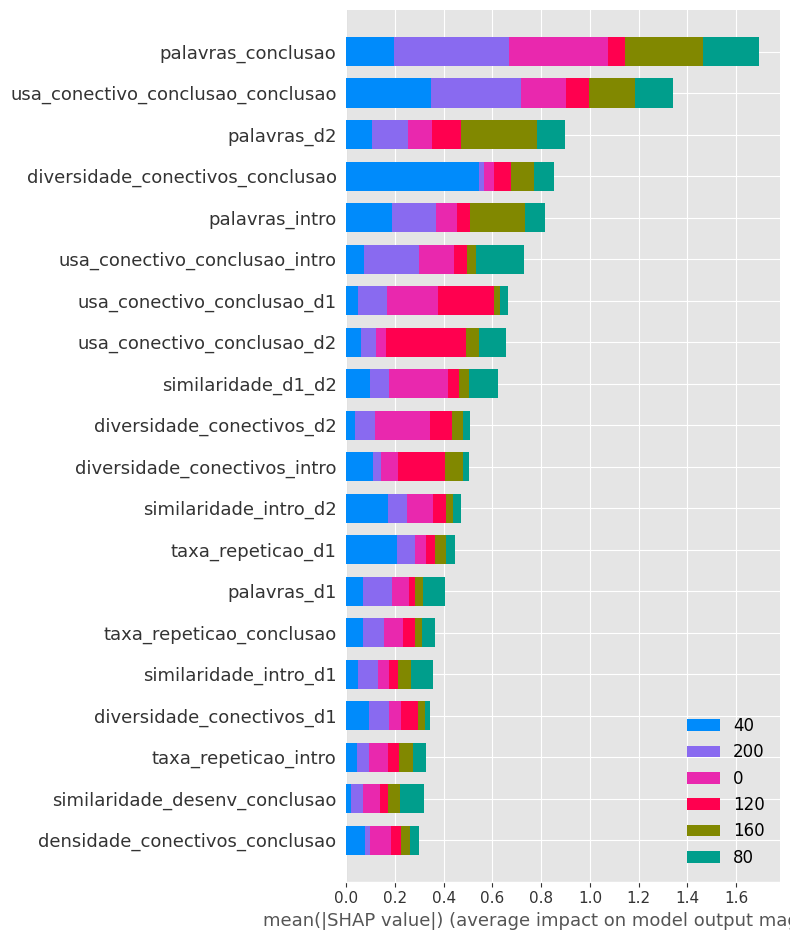


Gerando gráficos de impacto detalhado (beeswarm) por nota...

--> Análise para a Nota: 0


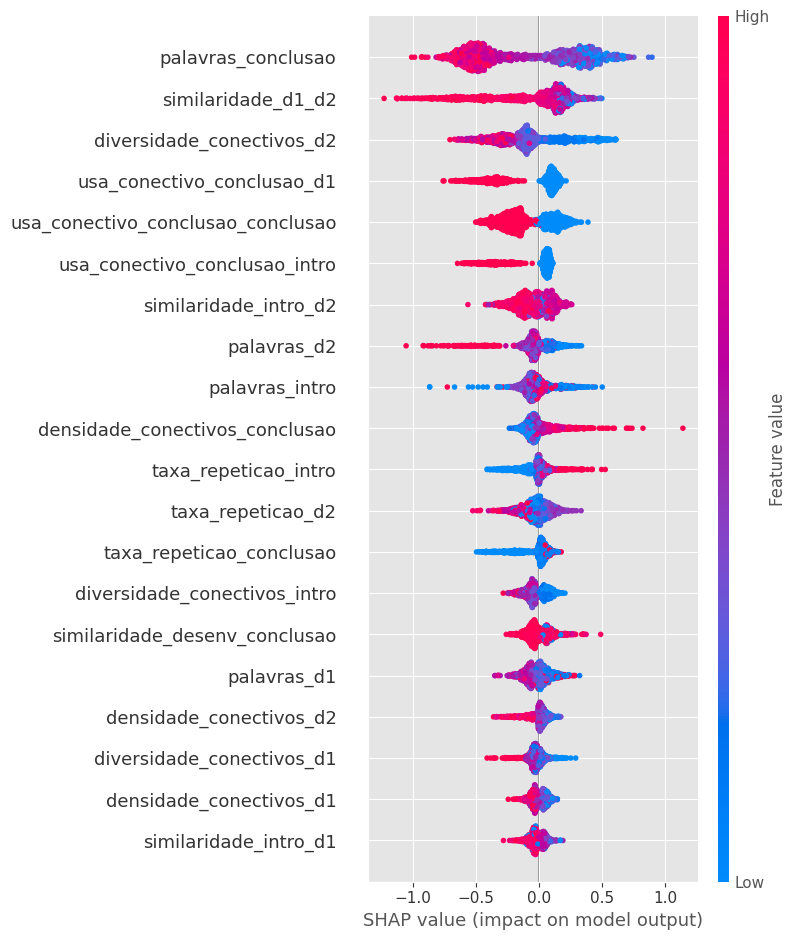


--> Análise para a Nota: 40


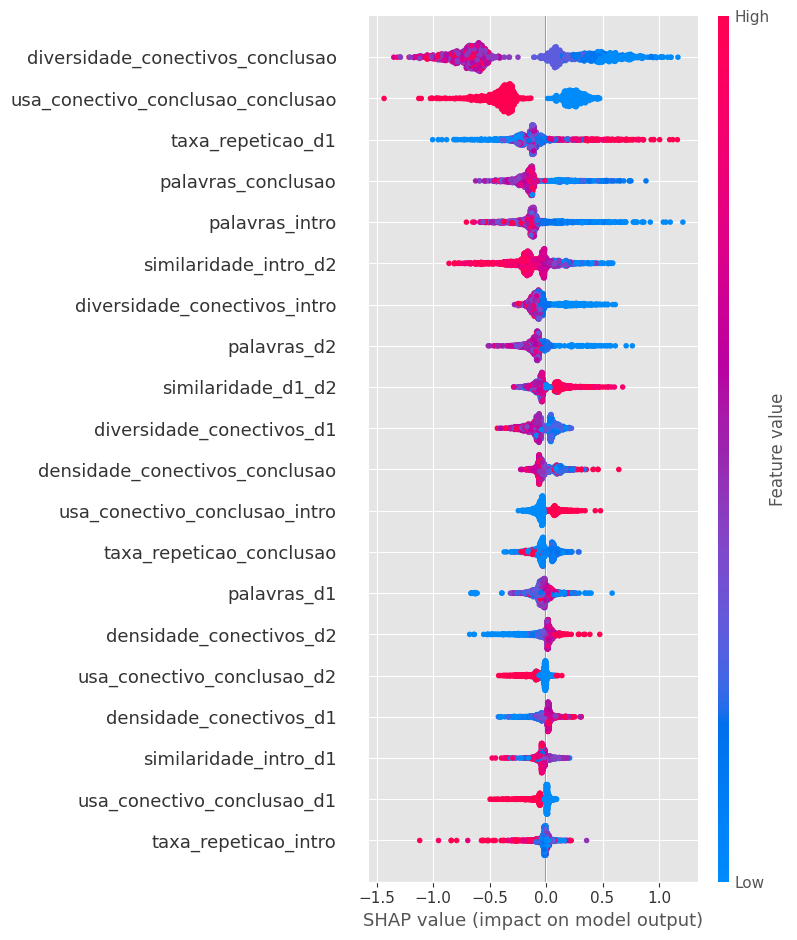


--> Análise para a Nota: 80


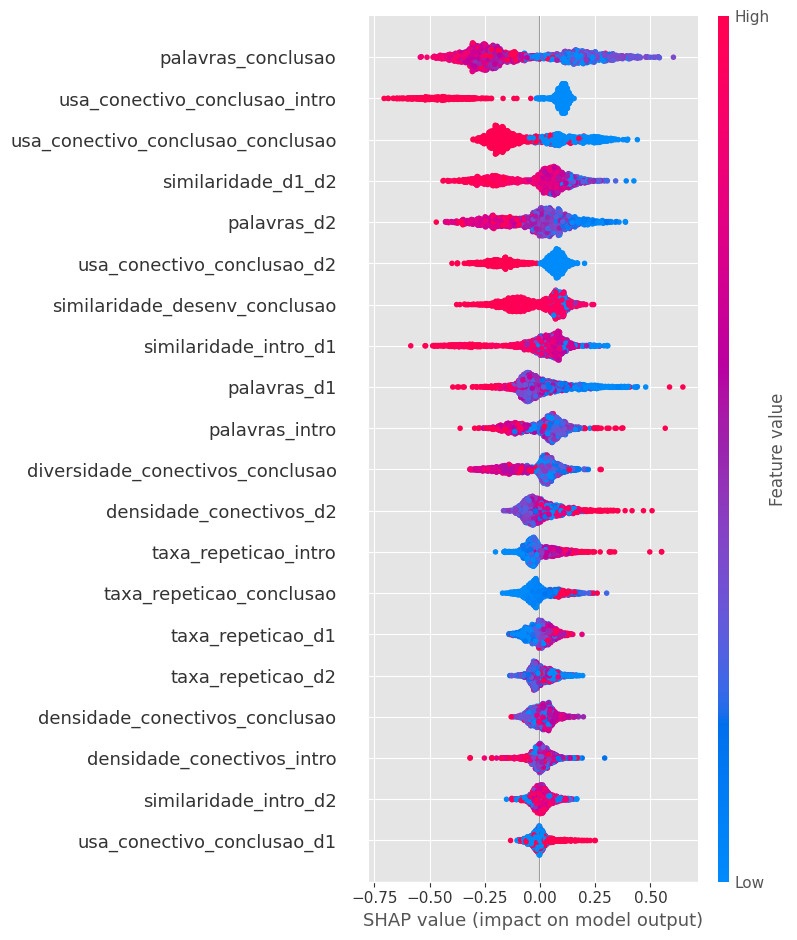


--> Análise para a Nota: 120


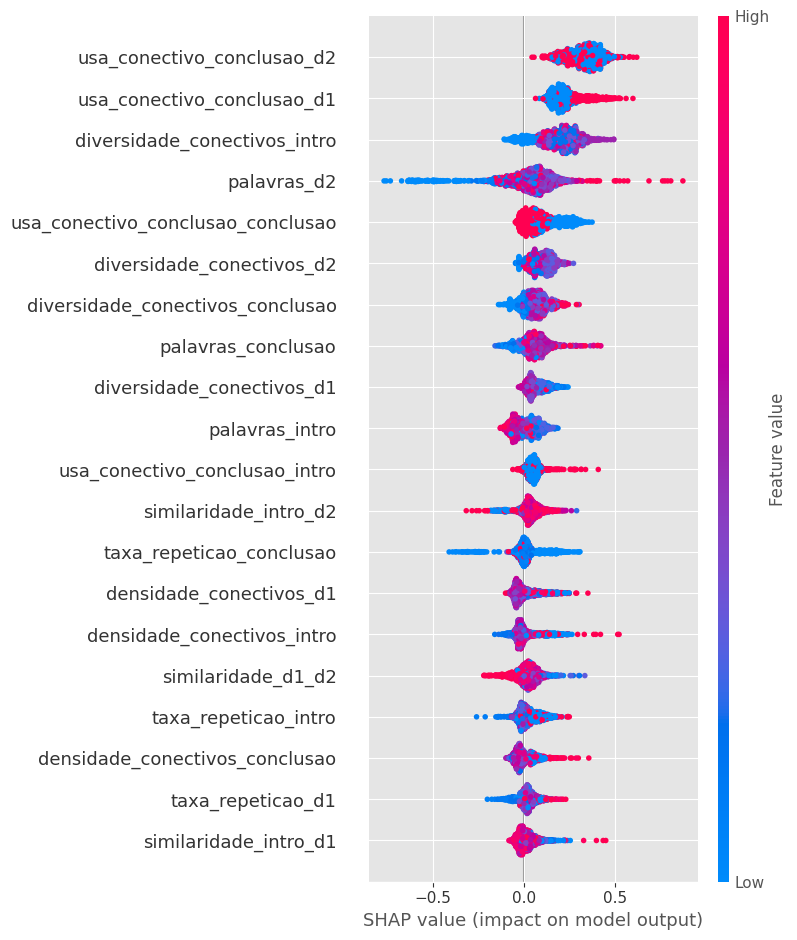


--> Análise para a Nota: 160


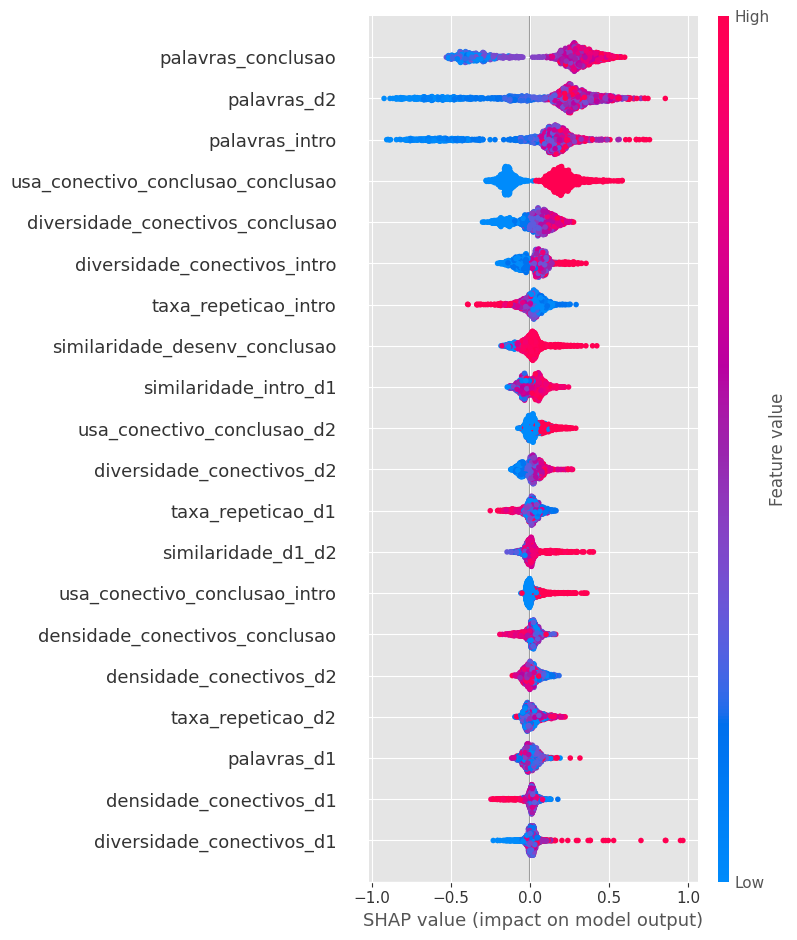


--> Análise para a Nota: 200


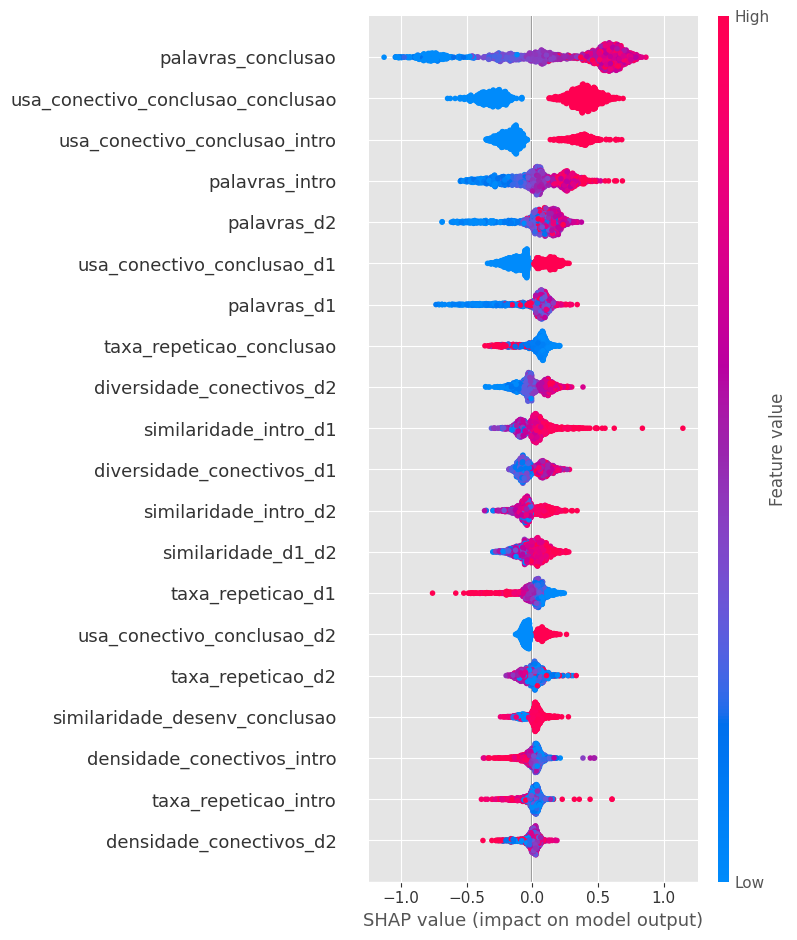

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import ast
import re
import joblib
import shap
from sklearn.model_selection import train_test_split
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True, verbose=0)

df_amostra = df_redacoes.sample(n=min(6000, len(df_redacoes)), random_state=42)
df_amostra['essay'] = df_amostra['essay'].fillna('').astype(str)
df_features = df_amostra['essay'].parallel_apply(extrair_features_argumentativas)
df_super = df_amostra.join(df_features).fillna(0)

features = list(df_features.columns)
X = df_super[features]
y = df_super['c4']

_, X_test, _, _ = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

nome_do_arquivo_modelo = 'modelo_c4_lgbm.joblib'
model = joblib.load(nome_do_arquivo_modelo)

print("\n--- Iniciando Análise de Features por Classe com SHAP ---")

explainer = shap.TreeExplainer(model)
print("Calculando objeto Explanation do SHAP...")
explanation = explainer(X_test)

print("\nGerando gráfico de importância de features por nota...")
shap.summary_plot(explanation, plot_type="bar", class_names=model.classes_)

print("\nGerando gráficos de impacto detalhado (beeswarm) por nota...")
for i, class_name in enumerate(model.classes_):
    print(f"\n--> Análise para a Nota: {class_name}")
    shap.summary_plot(explanation[:, :, i])

O primeiro gráfico revela que as características mais importantes para o modelo de forma geral são:

1. O número de palavras na conclusão é o fator mais decisivo.
2. O uso de conectivos conclusivos na conclusão.
3. O número de palavras no segundo parágrafo de desenvolvimento.
4. A variedade de conectivos utilizados na conclusão.

No entanto, a importância de uma feature muda drasticamente dependendo da nota que está sendo avaliada. Os gráficos SHAP nos mostram exatamente isso.

Análise para a Nota 0:
*  Pouquíssimas palavras na conclusão (pontos azuis) têm um forte impacto negativo, empurrando a previsão para essa nota. Isso sugere que redações com conclusões muito curtas ou inexistentes são penalizadas.
*  Uma alta similaridade entre os parágrafos de desenvolvimento (pontos vermelhos) também contribui negativamente.

Análise para a Nota 40:
*  A falta de variedade nos conectivos da conclusão (pontos azuis) é um fator chave que leva a uma nota baixa como 40.
*  Não usar um conectivo conclusivo na conclusão (pontos azuis) tem um grande impacto negativo.
*  Uma alta taxa de repetição de palavras no primeiro desenvolvimento (pontos vermelhos) também puxa a nota para baixo.

Análise para a Nota 80:
*  Assim como nas notas mais baixas, uma conclusão com poucas palavras ainda é um indicador negativo forte.
*  Não usar um conectivo de conclusão na introdução (o que é esperado) aparece aqui, mas a distribuição é mista, sugerindo que outras features são mais decisivas.
*  A ausência de conectivos conclusivos na conclusão continua sendo um forte penalizador.

Análise para a Nota 120:
*  Usar um conectivo de conclusão no segundo parágrafo de desenvolvimento (pontos vermelhos) impacta positivamente a previsão para 120. Isso pode indicar uma estrutura textual mais clara e organizada.
*  Outro fator curioso, é que o número baixo de palavras no segundo desenvolvimento (pontos azuis) tende a levar a essa nota.
*  O modelo parece usar uma combinação mais equilibrada de features para prever a nota 120, o que está alinhado com o fato de ser a classe com mais previsões corretas na matriz de confusão.

Análise para a Nota 160:
*  Ter uma conclusão mais longa (pontos vermelhos) é um forte indicador positivo para uma nota 160.
*  Um segundo parágrafo de desenvolvimento mais robusto em palavras também eleva a nota.
*  Uma introdução com menos palavras (pontos azuis) parece correlacionada com notas mais altas, talvez indicando objetividade.

Análise para a Nota 200:
*  Uma conclusão bem desenvolvida e com muitas palavras (pontos vermelhos) tem o maior impacto positivo.
*  O uso correto de conectivos na conclusão é fundamental para atingir a nota máxima.
*  Um bom volume de palavras tanto na introdução quanto no desenvolvimento também contribui significativamente.
*  Uma alta similaridade semântica entre a introdução e os desenvolvimentos (pontos vermelhos) é vista como positiva, indicando que os argumentos estão bem alinhados com a tese apresentada inicialmente.

**Análise do Modelo BERT com Ponderação de Classes**

Para superar as limitações da análise baseada em features manuais, esta abordagem adota uma estratégia de *Deep Learning*, utilizando um modelo de linguagem pré-treinado de grande escala: o `neuralmind/bert-base-portuguese-cased`. Diferente do LightGBM, que depende de métricas estruturais explicitamente calculadas (como contagem de palavras e densidade de conectivos), o BERT processa o texto bruto da redação, aprendendo a interpretar o contexto, a semântica e as nuances da escrita.

O modelo BERT, que já possui um vasto conhecimento da língua portuguesa, é especializado na tarefa de avaliação. Ele é treinado (*fine-tuning*) com o *dataset* de redações para aprender a associar os padrões textuais às notas da Competência 4.

Este método utiliza uma ponderação de classes (`class_weight`) diretamente na função de perda para que erros em classes minoritárias recebam uma penalidade maior, forçando o modelo a dedicar mais atenção a esses exemplos.

O modelo é treinado por 3 épocas, com seus resultados de validação monitorados a cada época para salvar a melhor versão, evitando o *overfitting* e garantindo que o modelo final seja aquele com o melhor desempenho no *F1-Score Macro*.

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer
)
from datasets import Dataset
import transformers

def run_training():
    print(f"Versão da biblioteca 'transformers' em uso: {transformers.__version__}")

    if torch.cuda.is_available():
        device = torch.device("cuda")
        print(f"GPU encontrada: {torch.cuda.get_device_name(0)}")
    else:
        device = torch.device("cpu")
        print("GPU não encontrada. Usando CPU (processo será muito lento).")

    try:
        df_redacoes = pd.read_csv("extended_essay-br.csv").dropna(subset=['essay', 'c4'])
    except FileNotFoundError:
        print("ERRO: Arquivo 'extended_essay-br.csv' não encontrado. Certifique-se de que ele está no ambiente.")
        return

    labels_unicos = sorted(df_redacoes['c4'].unique())
    label2id = {int(label): int(i) for i, label in enumerate(labels_unicos)}
    id2label = {int(i): int(label) for i, label in enumerate(labels_unicos)}
    num_labels = len(labels_unicos)
    df_redacoes['labels'] = df_redacoes['c4'].map(label2id)

    print("\nDistribuição original das classes:")
    print(df_redacoes['c4'].value_counts().sort_index())

    class WeightedLossTrainer(Trainer):
        def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
            labels = inputs.pop("labels")
            outputs = model(**inputs)
            logits = outputs.get("logits")
            loss_fct = torch.nn.CrossEntropyLoss(weight=self.class_weights)
            loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
            return (loss, outputs) if return_outputs else loss

    print("\nPasso 2: Calculando os pesos para as classes desbalanceadas...")
    class_weights = compute_class_weight(
        'balanced',
        classes=np.unique(df_redacoes['labels']),
        y=df_redacoes['labels'].to_numpy()
    )
    class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)
    print("Pesos calculados:", class_weights_tensor)

    print("\nPasso 3: Preparando e dividindo os dados...")
    train_df, val_df = train_test_split(df_redacoes, test_size=0.2, random_state=42, stratify=df_redacoes['labels'])
    train_dataset = Dataset.from_pandas(train_df.reset_index(drop=True))
    val_dataset = Dataset.from_pandas(val_df.reset_index(drop=True))

    model_name = "neuralmind/bert-base-portuguese-cased"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    def tokenize_function(examples):
        return tokenizer(examples["essay"], padding="max_length", truncation=True, max_length=512)
    train_dataset_tokenized = train_dataset.map(tokenize_function, batched=True)
    val_dataset_tokenized = val_dataset.map(tokenize_function, batched=True)

    model = AutoModelForSequenceClassification.from_pretrained(
        model_name, num_labels=num_labels, id2label=id2label, label2id=label2id
    ).to(device)

    batch_size = 8
    num_train_examples = len(train_dataset_tokenized)
    steps_per_epoch = num_train_examples // batch_size

    training_args = TrainingArguments(
        output_dir="./results_c4_weighted",
        num_train_epochs=3,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=8,
        learning_rate=2e-5,
        weight_decay=0.01,
        eval_strategy="steps",
        eval_steps=steps_per_epoch,
        save_steps=steps_per_epoch,
        load_best_model_at_end=True,
        metric_for_best_model="f1_macro",
        report_to="none"
    )

    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        predictions = np.argmax(logits, axis=-1)
        f1 = f1_score(labels, predictions, average="macro")
        acc = accuracy_score(labels, predictions)
        return {"accuracy": acc, "f1_macro": f1}

    trainer = WeightedLossTrainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset_tokenized,
        eval_dataset=val_dataset_tokenized,
        compute_metrics=compute_metrics,
        tokenizer=tokenizer,
    )
    trainer.class_weights = class_weights_tensor

    trainer.train()
    eval_results = trainer.evaluate()
    print(f"Resultados da Avaliação Final: {eval_results}")

    predictions, labels, _ = trainer.predict(val_dataset_tokenized)
    y_pred = np.argmax(predictions, axis=1)
    target_names = [str(id2label[i]) for i in range(num_labels)]
    print(classification_report(labels, y_pred, target_names=target_names, zero_division=0))

run_training()

Versão da biblioteca 'transformers' em uso: 4.54.0
GPU encontrada: Tesla T4

Distribuição original das classes:
c4
0       207
40       65
80      885
120    2459
160    1822
200    1139
Name: count, dtype: int64

Passo 2: Calculando os pesos para as classes desbalanceadas...
Pesos calculados: tensor([ 5.2955, 16.8641,  1.2386,  0.4458,  0.6016,  0.9624], device='cuda:0')

Passo 3: Preparando e dividindo os dados...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/5261 [00:00<?, ? examples/s]

Map:   0%|          | 0/1316 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-2978924546.py:101: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `WeightedLossTrainer.__init__`. Use `processing_class` instead.
  trainer = WeightedLossTrainer(


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Step,Training Loss,Validation Loss,Accuracy,F1 Macro
657,1.448600,1.248075,0.514438,0.366018
1314,1.195300,1.322438,0.524316,0.368100
1971,1.027200,1.384916,0.537994,0.389133


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Resultados da Avaliação Final: {'eval_loss': 1.384915828704834, 'eval_accuracy': 0.5379939209726444, 'eval_f1_macro': 0.38913337956724714, 'eval_runtime': 35.7438, 'eval_samples_per_second': 36.818, 'eval_steps_per_second': 4.616, 'epoch': 3.0}


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.26      0.12      0.17        41
          40       0.00      0.00      0.00        13
          80       0.42      0.43      0.42       177
         120       0.60      0.53      0.56       492
         160       0.49      0.50      0.49       365
         200       0.60      0.82      0.69       228

    accuracy                           0.54      1316
   macro avg       0.39      0.40      0.39      1316
weighted avg       0.53      0.54      0.53      1316



Usando dispositivo: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/1316 [00:00<?, ? examples/s]

/tmp/ipython-input-777202140.py:52: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, tokenizer=tokenizer)
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


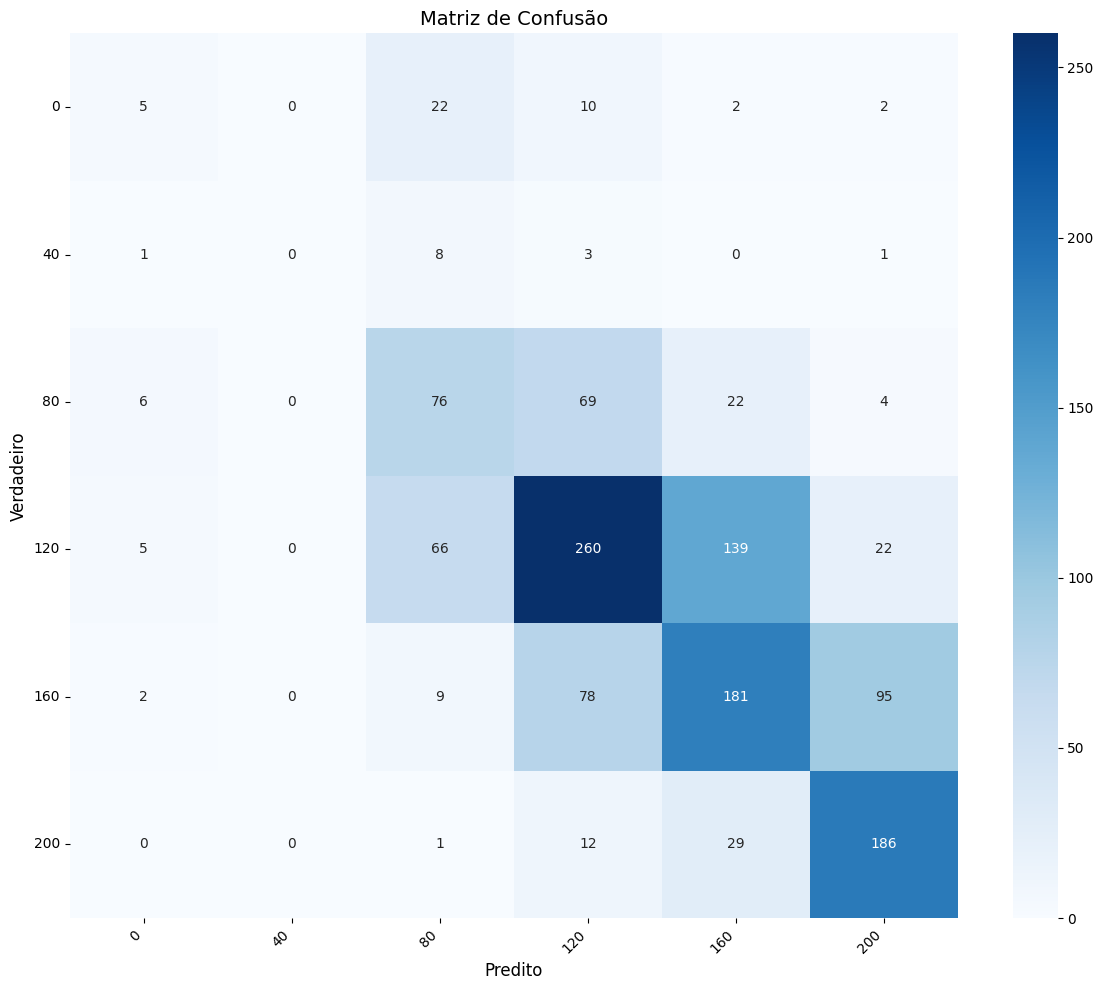

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer
)
from datasets import Dataset
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.special import softmax

os.environ["WANDB_DISABLED"] = "true"
os.environ["WANDB_SILENT"] = "true"

def main():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Usando dispositivo: {device}")

    try:
        df_redacoes = pd.read_csv("extended_essay-br.csv").dropna(subset=['essay', 'c4'])
    except FileNotFoundError:
        raise FileNotFoundError("Arquivo 'extended_essay-br.csv' não encontrado!")

    labels_unicos = sorted(df_redacoes['c4'].unique())
    label2id = {int(label): int(i) for i, label in enumerate(labels_unicos)}
    id2label = {int(i): int(label) for i, label in enumerate(labels_unicos)}
    df_redacoes['labels'] = df_redacoes['c4'].map(label2id)

    train_df, val_df = train_test_split(
        df_redacoes,
        test_size=0.2,
        random_state=42,
        stratify=df_redacoes['labels']
    )

    model_path = "./results_c4_weighted/checkpoint-1971"
    model = AutoModelForSequenceClassification.from_pretrained(model_path).to(device)

    tokenizer = AutoTokenizer.from_pretrained("neuralmind/bert-base-portuguese-cased")

    def tokenize_function(examples):
        return tokenizer(examples["essay"], padding="max_length", truncation=True, max_length=512)

    val_dataset = Dataset.from_pandas(val_df.reset_index(drop=True))
    val_dataset_tokenized = val_dataset.map(tokenize_function, batched=True)

    trainer = Trainer(model=model, tokenizer=tokenizer)
    predictions, labels, _ = trainer.predict(val_dataset_tokenized)
    y_pred = np.argmax(predictions, axis=1)

    target_names = [str(id2label[i]) for i in range(len(id2label))]
    cm = confusion_matrix(labels, y_pred)

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names,
                yticklabels=target_names)
    plt.title('Matriz de Confusão', fontsize=14)
    plt.ylabel('Verdadeiro', fontsize=12)
    plt.xlabel('Predito', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

Com uma precisão final de 53.8%, o modelo BERT demonstra um avanço considerável em relação à abordagem com LightGBM. A principal força desta arquitetura reside na sua capacidade de identificar redações de alta performance. O modelo alcançou um *recall* de 82% para a nota 200, o que significa que foi capaz de identificar corretamente a grande maioria das redações que atingiram a pontuação máxima.

O modelo demonstra uma boa capacidade de acerto para as notas 120, 160 e 200, respectivamente. Os números de acertos, que formam a diagonal principal mais escura do gráfico, são a prova visual de que o modelo está acertando.

No entanto, o desafio das classes minoritárias persiste. O relatório de classificação revela que o modelo foi completamente incapaz de identificar redações de nota 40, com precisão e *recall* zerados para esta categoria. O desempenho na nota 0 também foi extremamente baixo. Mas isso é esperado, já que não há exemplos o suficiente de redações com as duas notas menores no *dataset*.